In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from mlxtend.frequent_patterns import apriori
np.random.seed(333)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.model_selection import train_test_split

np.random.seed(333)

# Group Project

In [2]:
data = pd.read_csv('covid_train.csv')
print(data.shape)
data.head()

(3864, 92)


,country_name,country_code,pop_total,pop_density,GDP,basic_water,safe_water,basic_san,safe_san,C1_School closing_1,...,transit,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,prev_cases,total_cases,new_cases_percentages
0,Kyrgyzstan,KGZ,6456900,32.965589,5470.811536,87.455903,68.223320,96.507067,NaN,0,...,NaN,-14.000000,-5.000000,11.000000,-13.666667,-10.666667,-2.666667,2789,3151,2
1,Italy,ITA,60297396,205.418372,44196.693100,99.442734,95.039615,98.772433,96.208014,0,...,59.42,-13.000000,-6.666667,57.000000,-28.666667,-27.666667,4.666667,238833,239706,1
2,Canada,CAN,37589262,4.075188,51341.705170,99.436244,98.860854,99.286013,82.316398,0,...,60.08,-8.666667,2.333333,169.666667,-31.666667,-18.333333,2.333333,130493,131495,2
3,Bolivia,BOL,11513100,10.480146,9086.060696,92.848735,NaN,60.716938,22.938271,0,...,NaN,-63.666667,-48.666667,-55.666667,-64.333333,-49.666667,28.333333,42984,45565,3
4,Austria,AUT,8877067,107.127967,59110.562560,100.000000,98.906201,99.972910,96.746738,0,...,NaN,2.000000,-1.666667,112.333333,-20.666667,-34.666667,3.000000,23373,23875,2


# Task 1 - Countries Data

Before doing part (a), we need to first delete the duplicated rows from the countries_data. After deletion, duplicate rows are found to be 3757 and the data size reduces to 107 rows.

In [3]:
countries_data = data.iloc[:,:9]
print("original data size for task 1: ", countries_data.shape)

countries_data2 = countries_data[countries_data.duplicated()]
countries_data.drop_duplicates(inplace=True) 
print("Duplicate Rows except first occurrence based on all columns are : " + str(countries_data2.shape[0]))
print("data size after dropping duplicates: ", countries_data.shape)

original data size for task 1:  (3864, 9)
Duplicate Rows except first occurrence based on all columns are : 3757
data size after dropping duplicates:  (107, 9)


#### (a) Data preprocessing: 
To deal with the missing data in this subset, train an imputer using scikit-learn's IterativeImputer to fit and transform the data. Next, standardize the data (Countries Data) such that the mean is 0 and standard deviation is 1. Remove all the records that are outliers.

In [4]:
countries_data.isnull().sum()   #detect missing data

country_name     0
country_code     0
pop_total        0
pop_density      1
GDP              0
basic_water      0
safe_water      36
basic_san        0
safe_san        38
dtype: int64

In [5]:
df = countries_data.iloc[:,2:].values.tolist()

#fit the entire countries data (except first two string columns) into the imputer 
imp_mean = IterativeImputer(random_state=0).fit_transform(df) 

new_df = pd.DataFrame(imp_mean,columns=countries_data.iloc[:,2:].columns)
new_df.index = countries_data.index

for col in new_df.columns:
    countries_data[col] = new_df[col]
countries_data.tail()

,country_name,country_code,pop_total,pop_density,GDP,basic_water,safe_water,basic_san,safe_san
322,Iraq,IRQ,39309783.0,88.530570,11332.141470,96.533478,58.833327,94.121022,41.067753
377,Japan,JPN,126264931.0,347.073458,43235.717570,99.010208,98.453707,99.894708,98.760358
486,Burkina Faso,BFA,20321378.0,72.191283,2280.380037,47.888127,15.158249,19.402087,11.796661
683,Senegal,SEN,16296364.0,82.347478,3535.568779,80.677854,35.527348,51.473990,21.455765
767,Mali,MLI,19658031.0,15.635016,2423.828765,78.260830,26.972957,39.335420,18.709404


In [6]:
countries_data.isnull().sum()   #confirming no missing value

country_name    0
country_code    0
pop_total       0
pop_density     0
GDP             0
basic_water     0
safe_water      0
basic_san       0
safe_san        0
dtype: int64

In [7]:
scaled_data = StandardScaler().fit_transform(countries_data.iloc[:,2:])  #standardize
scaled_data = pd.DataFrame(scaled_data, columns=countries_data.columns[2:])
scaled_data.index = countries_data.index
scaled_data.describe()[1:3]       #verifying

,pop_total,pop_density,GDP,basic_water,safe_water,basic_san,safe_san
mean,-1.971424e-17,-2.075183e-18,-1.411125e-16,-5.686002e-16,1.763906e-16,-4.150366e-16,-2.490220e-17
std,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00


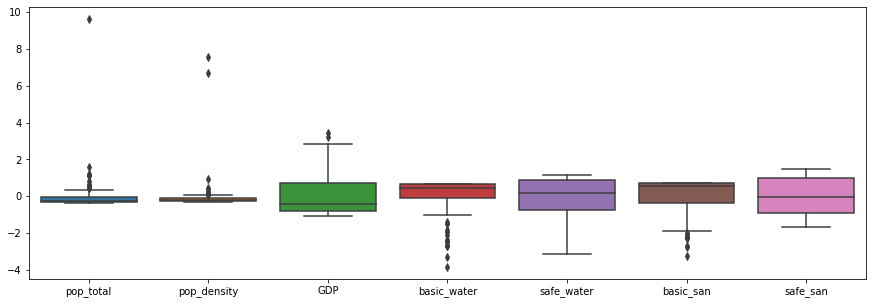

In [8]:
plt.figure(figsize=(15,5))
sns.boxplot(data=scaled_data)

In [9]:
X_data = scaled_data
num_record = X_data.shape[0]

Q1 = X_data.quantile(0.25)
Q3 = X_data.quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR       # 1.5 should be the best value to indicate the outlier values mathematically
UB = Q3 + 1.5 * IQR

X_data = X_data[~( (X_data < LB) | (X_data > UB) ).any(axis=1) ]
new_num_record = X_data.shape[0]
print("Number of deleted data:  ", num_record - new_num_record)
print("data remained: ", new_num_record)

Number of deleted data:   32
data remained:  75


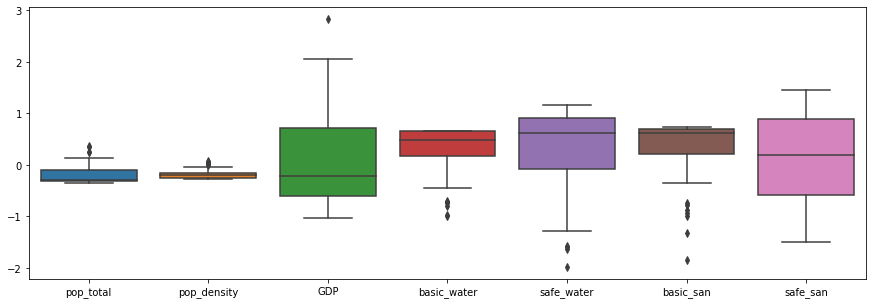

In [10]:
plt.figure(figsize=(15,5))
sns.boxplot(data=X_data) #observe the change of data distribution after deleting outliers

#### (b) Hierarchical clustering:
Using the Euclidean distance to measure distance between samples, show the top five levels of the dendrograms obtained with (i) single-link distance, (ii) complete-link distance, and (iii) group average distance. From the dendrograms, extract the 3-cluster solutions. Visualize each clustering solution by projecting the data samples to 2D using t-distributed Stochastic Neighbor Embedding (t-SNE). Please use different colors for different clusters.

In [11]:
def plot_dendrogram(model, **kwargs):   #provided in tutorial notes
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

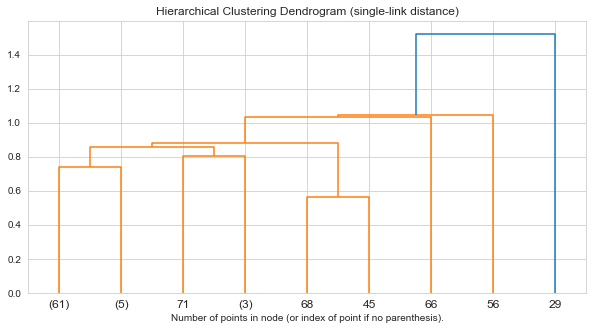

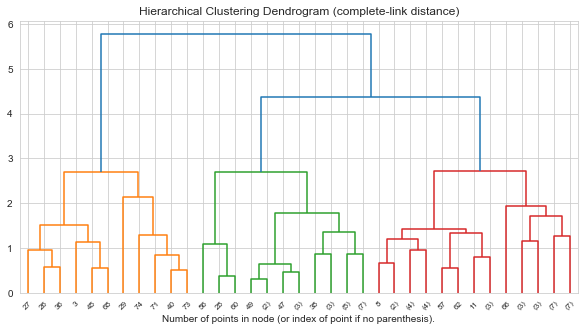

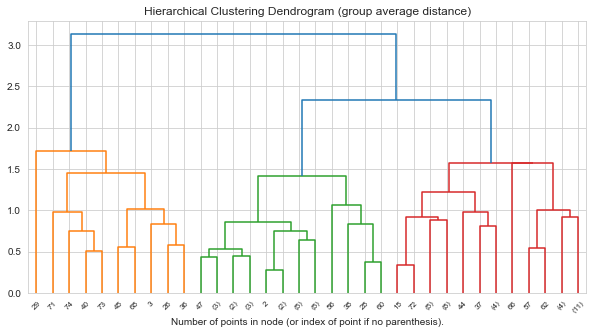

In [12]:
task_b_data = X_data

criteria = ['single', 'complete', 'average']
criteria_names = ['single-link distance', 'complete-link distance', 'group average distance']
sns.set_style(style="whitegrid")

for i, criterion in enumerate(criteria):
    hierar = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage=criterion).fit(task_b_data) #“complete”, “average”, “single”
    
    plt.figure(figsize=(10,5))
    plt.title('Hierarchical Clustering Dendrogram ('+criteria_names[i]+')')
    plot_dendrogram(hierar, truncate_mode='level', p=5)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()

data_embedded shape =  (75, 2)


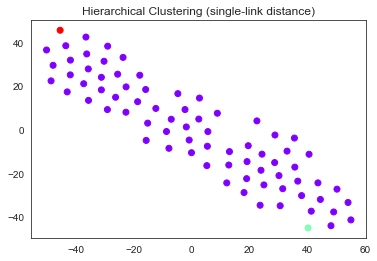

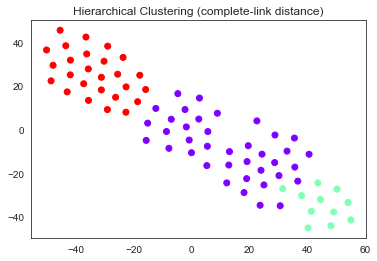

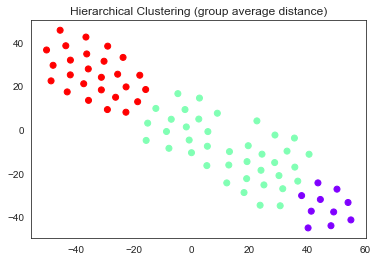

In [13]:
data_embedded = TSNE(n_components=2, random_state=0).fit_transform(task_b_data)  #embedded the dataset for visualization
print("data_embedded shape = ", data_embedded.shape)

y_hierar = []
for criterion in criteria:
    hierar = AgglomerativeClustering(n_clusters=3, linkage=criterion)
    y_hierar.append(hierar.fit_predict(task_b_data))

#visualize    
sns.set_style(style="white")
for i, criterion in enumerate(criteria):
    plt.title('Hierarchical Clustering ('+criteria_names[i]+')')
    plt.scatter(data_embedded[:, 0], data_embedded[:, 1], c=y_hierar[i], cmap ='rainbow')
    plt.show()

#### (c) Clustering validity measures: 
There are a number of cluster validity measures that can be used to assess the clustering solution's quality. Here, you will use the Davies-Bouldin score, implemented in the function davies bouldin score, and the Silhouette score, implemented in the function silhouette score. By using these scores, compare and discuss the 3-cluster results obtained in task 1(b).

In [14]:
n_features_list = task_b_data.values.tolist() #transform the feature data to list

d_score = []
print("Davies Bouldin Score:")

for i, criterion in enumerate(criteria):
    d_score.append(davies_bouldin_score(n_features_list, y_hierar[i]))
    print("\t" + criterion + ": " + str(d_score[i]) )
    
print("Best score (lowest): " + str(min(d_score)) );print() # lower value means less similarity between clusters, indicating better clustering

s_score = []
print("Silhouette Score:")

for i, criterion in enumerate(criteria):
    s_score.append(silhouette_score(n_features_list, y_hierar[i]))
    print("\t" + criterion + ": " + str(s_score[i]) )
    
print("Best score (highest): " + str(max(s_score)) ) # Positive value indicates a sample is assigned to the right cluster

Davies Bouldin Score:
	single: 0.5137742637032563
	complete: 0.819269481106398
	average: 0.7733178860340703
Best score (lowest): 0.5137742637032563

Silhouette Score:
	single: 0.10201944334301297
	complete: 0.4138670479526474
	average: 0.42968049502721367
Best score (highest): 0.42968049502721367


#### (d) Visualization: 
For each of the 3 clusters obtained by using the group average distance in task 1(b), show
- i. the names of the countries, and
- ii. summary statistics (including mean, standard deviation, and five-number summary) and boxplot for each attribute (use the values before standardization). Include two of these boxplots (i.e., corresponding to two attributes) in your report that best illustrate differences between the groups.
- iii. Create a scatter plot using the two attributes you chose in task 1(d)ii. Use different colors for the different clusters that each country belongs to.

In [15]:
task_d_data = countries_data[countries_data.index.isin(X_data.index)]
task_d_data["cluster"] = y_hierar[2]
print(task_d_data.shape)
task_d_data.head()

(75, 10)


,country_name,country_code,pop_total,pop_density,GDP,basic_water,safe_water,basic_san,safe_san,cluster
0,Kyrgyzstan,KGZ,6456900.0,32.965589,5470.811536,87.455903,68.223320,96.507067,43.456656,1
1,Italy,ITA,60297396.0,205.418372,44196.693100,99.442734,95.039615,98.772433,96.208014,2
2,Canada,CAN,37589262.0,4.075188,51341.705170,99.436244,98.860854,99.286013,82.316398,2
3,Bolivia,BOL,11513100.0,10.480146,9086.060696,92.848735,47.630985,60.716938,22.938271,0
4,Austria,AUT,8877067.0,107.127967,59110.562560,100.000000,98.906201,99.972910,96.746738,2


In [16]:
cluster_0_data = task_d_data[task_d_data['cluster'] == 0]
print("Cluster 0 has a data size of ", cluster_0_data.shape)
print("Countries in cluster 0 :")
print(cluster_0_data['country_name'].values.tolist()) 
cluster_0_data.iloc[:,2:9].describe()

Cluster 0 has a data size of  (10, 10)
Countries in cluster 0 :
['Bolivia', 'Guatemala', "Lao People's Democratic Republic", 'Peru', 'Cambodia', 'Myanmar', 'Nicaragua', 'Nepal', 'Senegal', 'Mali']


,pop_total,pop_density,GDP,basic_water,safe_water,basic_san,safe_san
count,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2.094376e+07,74.055834,6468.767884,84.978949,38.923178,62.543983,32.059497
std,1.428360e+07,61.137676,3379.900334,6.105321,14.191634,11.095004,12.594602
min,6.545502e+06,10.480146,2423.828765,78.260830,16.081866,39.335420,18.709404
25%,1.270892e+07,26.392651,3811.473443,80.889581,27.040556,59.599459,22.184779
50%,1.654528e+07,67.982832,5493.235881,81.917973,41.579167,63.193140,29.038677
75%,2.637104e+07,89.629179,8784.341511,90.548966,51.288046,72.023001,38.969355
max,5.404542e+07,195.939107,13380.364420,94.190581,55.990782,74.459410,58.053590


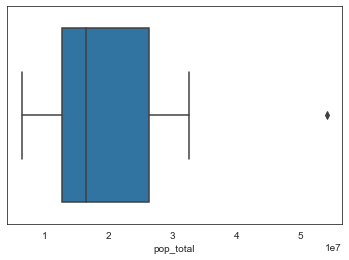

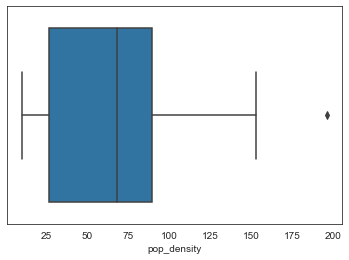

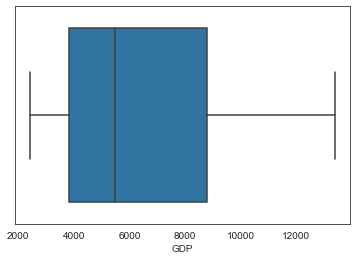

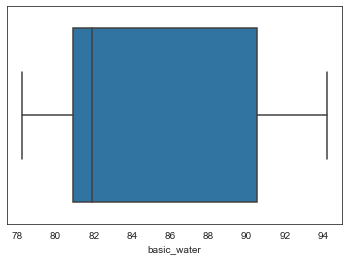

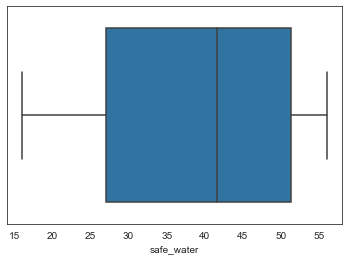

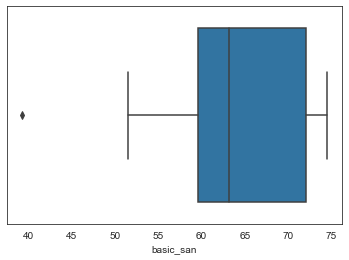

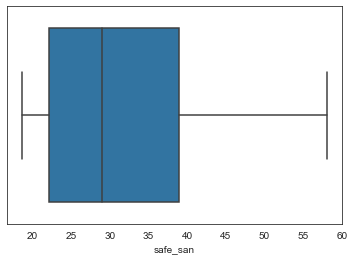

In [17]:
for i, col in enumerate(cluster_0_data.iloc[:,2:9].columns):
    plt.figure(i)
    sns.boxplot(x=col, data=cluster_0_data)

In [18]:
cluster_1_data = task_d_data[task_d_data['cluster'] == 1]
print("Cluster 1 has a data size of ", cluster_1_data.shape)
print("Countries in cluster 1 :")
print(cluster_1_data['country_name'].values.tolist()) #show all names in the report?
cluster_1_data.iloc[:,2:9].describe()

Cluster 1 has a data size of  (39, 10)
Countries in cluster 1 :
['Kyrgyzstan', 'Ukraine', 'Libyan Arab Jamahiriya', 'Dominican Republic', 'Egypt', 'Oman', 'Costa Rica', 'Colombia', 'Uzbekistan', 'Morocco', 'South Africa', 'El Salvador', 'Vietnam', 'Azerbaijan', 'Algeria', 'Moldova, Republic of', 'Paraguay', 'Thailand', 'Bosnia and Herzegovina', 'Ecuador', 'Jordan', 'Venezuela', 'Sri Lanka', 'Serbia', 'Albania', 'Tunisia', 'Croatia', 'Turkey', 'Honduras', 'Panama', 'Uruguay', 'Kazakhstan', 'Romania', 'Bulgaria', 'Chile', 'Puerto Rico', 'Argentina', 'Belarus', 'Iraq']


,pop_total,pop_density,GDP,basic_water,safe_water,basic_san,safe_san
count,3.900000e+01,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,2.464838e+07,95.322751,17489.428637,95.572848,78.475592,92.347198,52.087110
std,2.666615e+07,91.084068,8003.124202,3.982459,11.437728,6.657334,17.906308
min,2.657637e+06,3.795632,5470.811536,85.522116,58.833327,75.747098,16.986489
25%,6.455226e+06,38.857146,11833.434120,93.673354,70.144795,87.787643,41.539256
50%,1.073896e+07,77.029671,15643.731450,96.483971,75.068012,94.258505,52.535786
75%,3.789078e+07,101.742866,22700.898870,99.007799,89.735831,97.453477,64.635585
max,1.003881e+08,360.017362,35948.191960,100.000000,98.639170,100.000001,80.554925


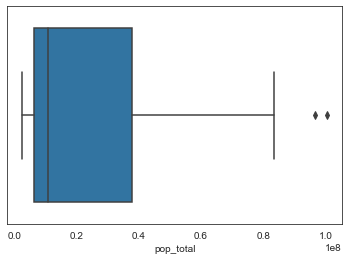

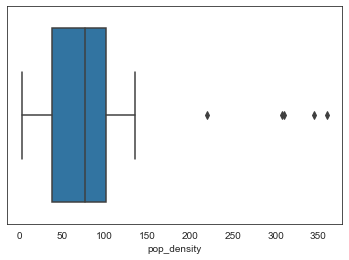

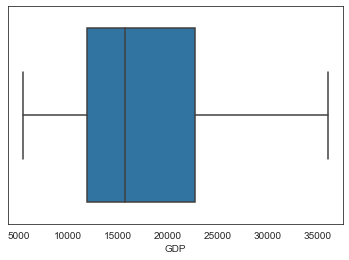

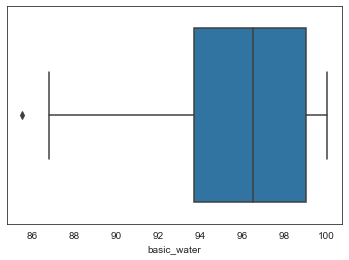

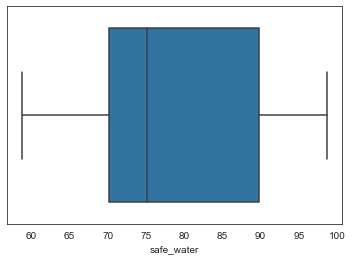

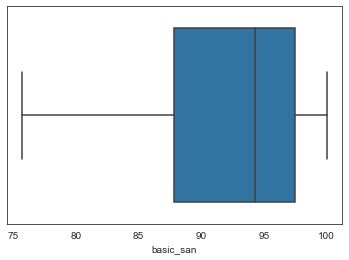

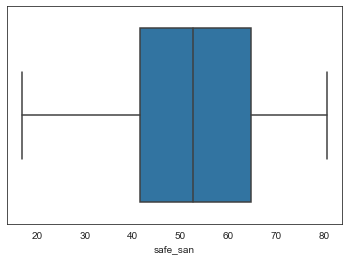

In [19]:
for i, col in enumerate(cluster_1_data.iloc[:,2:9].columns):
    plt.figure(i)
    sns.boxplot(x=col, data=cluster_1_data)

In [20]:
cluster_2_data = task_d_data[task_d_data['cluster'] == 2]
print("Cluster 2 has a data size of ", cluster_2_data.shape)
print("Countries in cluster 2 :")
print(cluster_2_data['country_name'].values.tolist()) #show all names in the report?
cluster_2_data.iloc[:,2:9].describe()

Cluster 2 has a data size of  (26, 10)
Countries in cluster 2 :
['Italy', 'Canada', 'Austria', 'Czech Republic', 'Malaysia', 'New Zealand', 'United Kingdom', 'Slovakia', 'Kuwait', 'Poland', 'Switzerland', 'Greece', 'Finland', 'Portugal', 'Sweden', 'Norway', 'Germany', 'Hungary', 'Slovenia', 'Saudi Arabia', 'Australia', 'Ireland', 'France', 'United Arab Emirates', 'Spain', 'Denmark']


,pop_total,pop_density,GDP,basic_water,safe_water,basic_san,safe_san
count,2.600000e+01,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2.341429e+07,108.033904,49811.061718,99.605637,97.805082,98.929310,90.460826
std,2.378461e+07,77.052477,13900.266243,0.859682,2.866048,1.691049,7.606282
min,2.087946e+06,3.247871,29525.577360,96.695939,89.572762,91.245181,75.639872
25%,5.594874e+06,36.399485,41045.950625,99.740445,95.775224,98.778477,83.457854
50%,1.027744e+07,107.554727,49171.831160,99.999998,98.392232,99.255525,93.315917
75%,3.675908e+07,137.145556,55992.944715,100.000000,99.796934,99.820011,96.535138
max,8.313280e+07,274.708982,88240.901030,100.000005,103.952502,100.000000,100.000000


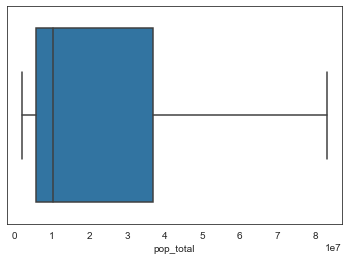

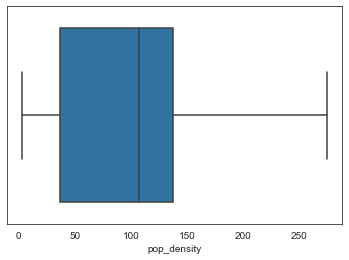

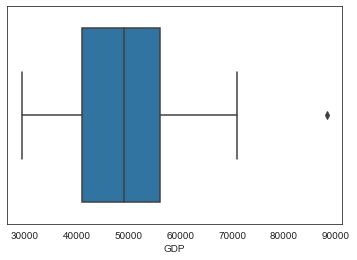

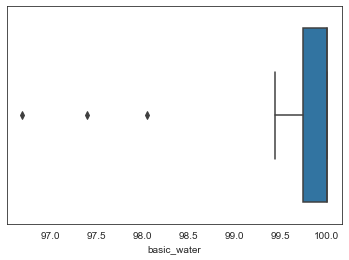

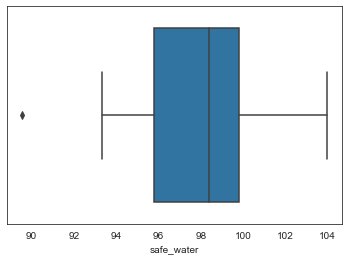

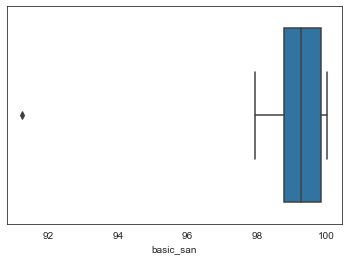

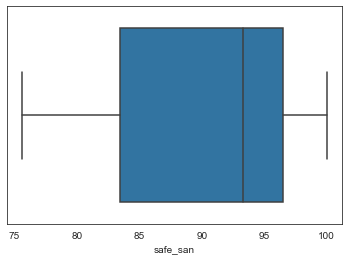

In [21]:
for i, col in enumerate(cluster_2_data.iloc[:,2:9].columns):
    plt.figure(i)
    sns.boxplot(x=col, data=cluster_2_data)

These two attributes have least overlapping areas, thus best illustrate the difference between cluster groups.

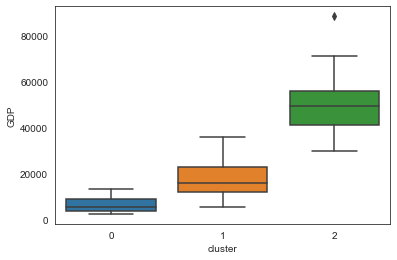

In [22]:
sns.boxplot(x='cluster',y='GDP',data =task_d_data)

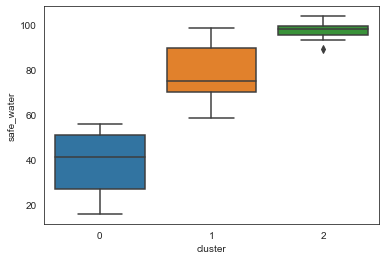

In [23]:
sns.boxplot(x='cluster',y='safe_water',data =task_d_data)

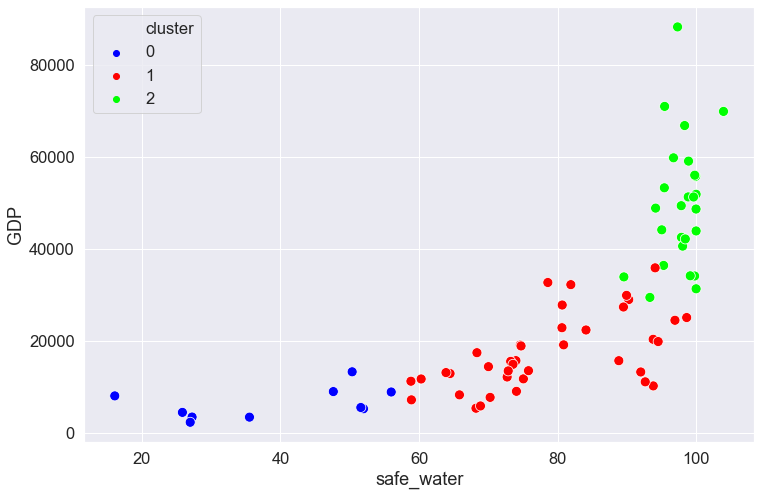

In [24]:
#visualizing the two attributes mentioned above
plt.figure(figsize=(12,8))
sns.set_style(style="darkgrid")
sns.set(font_scale=1.5)
ax = sns.scatterplot(x='safe_water', y='GDP', data=task_d_data, hue='cluster', palette='brg', s=100)
ax.set_ylabel('GDP')
ax.set_xlabel('safe_water')
plt.show()

In [25]:
task_d_data.to_csv('cluster.csv', encoding='utf-8', index=False) # task d dataset is saved for task 2
df = pd.read_csv('cluster.csv')
df.head()

,country_name,country_code,pop_total,pop_density,GDP,basic_water,safe_water,basic_san,safe_san,cluster
0,Kyrgyzstan,KGZ,6456900.0,32.965589,5470.811536,87.455903,68.223320,96.507067,43.456656,1
1,Italy,ITA,60297396.0,205.418372,44196.693100,99.442734,95.039615,98.772433,96.208014,2
2,Canada,CAN,37589262.0,4.075188,51341.705170,99.436244,98.860854,99.286013,82.316398,2
3,Bolivia,BOL,11513100.0,10.480146,9086.060696,92.848735,47.630985,60.716938,22.938271,0
4,Austria,AUT,8877067.0,107.127967,59110.562560,100.000000,98.906201,99.972910,96.746738,2


# Task 2

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
np.random.seed(333)
#numpy.set_printoptions(threshold = sys.maxsize)
data = pd.read_csv('covid_train.csv')
cluster = pd.read_csv('cluster.csv',index_col=0) #Q1d
countries = list(cluster.index)
list_of_policies_attr = ['country_name','C1_School closing_1','C1_School closing_2','C1_School closing_3',
                         'C2_Workplace closing_1','C2_Workplace closing_2','C2_Workplace closing_3',
                         'C3_Cancel public events_1','C3_Cancel public events_2','C4_Restrictions on gatherings_1',
                         'C4_Restrictions on gatherings_2','C4_Restrictions on gatherings_3',
                         'C4_Restrictions on gatherings_4','C5_Close public transport_1','C5_Close public transport_2',
                         'C6_Stay at home requirements_1','C6_Stay at home requirements_2',
                         'C6_Stay at home requirements_3','C7_Restrictions on internal movement_1',
                         'C7_Restrictions on internal movement_2','C8_International travel controls_1',
                         'C8_International travel controls_2','C8_International travel controls_3',
                         'C8_International travel controls_4','E1_Income support_1','E1_Income support_2',
                         'E2_Debt/contract relief_1','E2_Debt/contract relief_2','H1_Public information campaigns_1',
                         'H1_Public information campaigns_2','H2_Testing policy_1','H2_Testing policy_2',
                         'H2_Testing policy_3','H3_Contact tracing_1','H3_Contact tracing_2','H6_Facial Coverings_1',
                         'H6_Facial Coverings_2','H6_Facial Coverings_3','H6_Facial Coverings_4',
                         'new_cases_percentages']
p_data = pd.DataFrame()
for i in list_of_policies_attr:
    p_data[i] = data[i]
p_data['cluster'] = np.nan
for count in countries:
    p_data.loc[p_data.country_name==count,'cluster'] = cluster.loc[count,'cluster']
p_data = p_data.drop(['country_name'],axis=1)
p_data['new_cases_percentages'].where(~(p_data['new_cases_percentages']==0),other = 1,inplace = True) #treat class 0 and 1 as same class
p_data['new_cases_percentages'].where(~(p_data['new_cases_percentages']==2),other = 0,inplace = True)
p_data['new_cases_percentages'].where(~(p_data['new_cases_percentages']==3),other = 0,inplace = True)
p_data = p_data.rename(columns={'new_cases_percentages':'class_0_or_1'})
p_data.dropna(subset = ['cluster'],inplace = True)
print('p_data:')
print(p_data.shape) # now p_data shld only hv policies data and class and cluster
display(p_data)
print('\n')
draw = pd.DataFrame(columns = ['policy','cluster'])
for i in range(3): #for each clusters
    print('***\n***\n***')
    print('start of cluster '+str(i))
    records = p_data.loc[p_data['cluster']==i] #filter records with cluster i 
    records = records.drop(['cluster'],axis=1) #now we don't need cluster attr
    policy = records.drop(['class_0_or_1'],axis=1)
    num_records = len(policy.index)
    print('number of records = '+str(num_records))
    combinations = apriori(policy,min_support=0.3,use_colnames=True)
    combinations['length'] = combinations['itemsets'].apply(lambda x: len(x))
    print('frequent itemsets:')
    display(combinations)
    for p in range(len(combinations)): #for each frequent combinations
        list_of_combinations = list(combinations['itemsets'].iloc[p])
        temp_record = records
        for e in range(len(list_of_combinations)):
            temp_record = temp_record.loc[temp_record[list_of_combinations[e]]==1] #fliter records with corresponding policy combination
        len_temp = len(temp_record)
        passing_record = temp_record.loc[temp_record['class_0_or_1']==1]
        len_passing = len(passing_record)
        confidence = len_passing/len_temp
        if (confidence>=0.6):
            new_policy = {'policy':list(list_of_combinations), 'number':len_temp,'cluster':i}
            draw = draw.append(new_policy,ignore_index=True)
display(draw)

p_data:
(2726, 40)


,C1_School closing_1,C1_School closing_2,C1_School closing_3,C2_Workplace closing_1,C2_Workplace closing_2,C2_Workplace closing_3,C3_Cancel public events_1,C3_Cancel public events_2,C4_Restrictions on gatherings_1,C4_Restrictions on gatherings_2,...,H2_Testing policy_2,H2_Testing policy_3,H3_Contact tracing_1,H3_Contact tracing_2,H6_Facial Coverings_1,H6_Facial Coverings_2,H6_Facial Coverings_3,H6_Facial Coverings_4,class_0_or_1,cluster
0,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1.0
1,0,0,1,0,1,0,0,1,0,1,...,1,0,0,1,0,0,0,1,1,2.0
2,0,0,1,0,1,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,2.0
3,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0.0
4,0,0,0,1,0,0,1,0,0,1,...,0,1,0,1,0,1,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3856,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,2.0
3858,0,1,0,0,1,0,0,0,0,1,...,1,0,0,1,0,1,0,0,1,2.0
3860,0,0,0,1,0,0,1,0,0,1,...,1,0,0,1,0,0,1,0,1,1.0
3862,0,0,1,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,1.0




***
***
***
start of cluster 0
number of records = 307
frequent itemsets:


,support,itemsets,length
0,0.755700,(C1_School closing_3),1
1,0.583062,(C2_Workplace closing_2),1
2,0.732899,(C3_Cancel public events_2),1
3,0.596091,(C4_Restrictions on gatherings_4),1
4,0.527687,(C5_Close public transport_2),1
...,...,...,...
1256,0.306189,"(C4_Restrictions on gatherings_4, H6_Facial Co...",8
1257,0.364821,"(C4_Restrictions on gatherings_4, E1_Income su...",8
1258,0.306189,"(C4_Restrictions on gatherings_4, H6_Facial Co...",8
1259,0.364821,"(C4_Restrictions on gatherings_4, E1_Income su...",9


***
***
***
start of cluster 1
number of records = 1435
frequent itemsets:


,support,itemsets,length
0,0.670383,(C1_School closing_3),1
1,0.583275,(C2_Workplace closing_2),1
2,0.825784,(C3_Cancel public events_2),1
3,0.444599,(C4_Restrictions on gatherings_4),1
4,0.372822,(C5_Close public transport_2),1
...,...,...,...
186,0.321254,"(H1_Public information campaigns_2, C1_School ...",5
187,0.303833,"(C4_Restrictions on gatherings_4, H1_Public in...",5
188,0.303136,"(C6_Stay at home requirements_2, C1_School clo...",5
189,0.397909,"(H1_Public information campaigns_2, C1_School ...",5


***
***
***
start of cluster 2
number of records = 984
frequent itemsets:


,support,itemsets,length
0,0.325203,(C1_School closing_2),1
1,0.489837,(C2_Workplace closing_2),1
2,0.636179,(C3_Cancel public events_2),1
3,0.324187,(C4_Restrictions on gatherings_3),1
4,0.300813,(C4_Restrictions on gatherings_4),1
...,...,...,...
60,0.341463,"(H1_Public information campaigns_2, E1_Income ...",3
61,0.315041,"(H1_Public information campaigns_2, E1_Income ...",3
62,0.489837,"(H1_Public information campaigns_2, E1_Income ...",3
63,0.410569,"(H1_Public information campaigns_2, H3_Contact...",3


,policy,cluster,number
0,[H2_Testing policy_1],0,176.0
1,[H3_Contact tracing_1],0,122.0
2,"[H2_Testing policy_1, C2_Workplace closing_2]",0,99.0
3,"[H3_Contact tracing_1, C2_Workplace closing_2]",0,108.0
4,"[H1_Public information campaigns_2, H2_Testing...",0,172.0
5,"[H1_Public information campaigns_2, H3_Contact...",0,122.0
6,"[C1_School closing_3, H3_Contact tracing_1, C2...",0,95.0
7,"[H1_Public information campaigns_2, H2_Testing...",0,99.0
8,"[H1_Public information campaigns_2, H3_Contact...",0,108.0
9,"[H1_Public information campaigns_2, C1_School ...",0,95.0


***
***
***
start of cluster 0


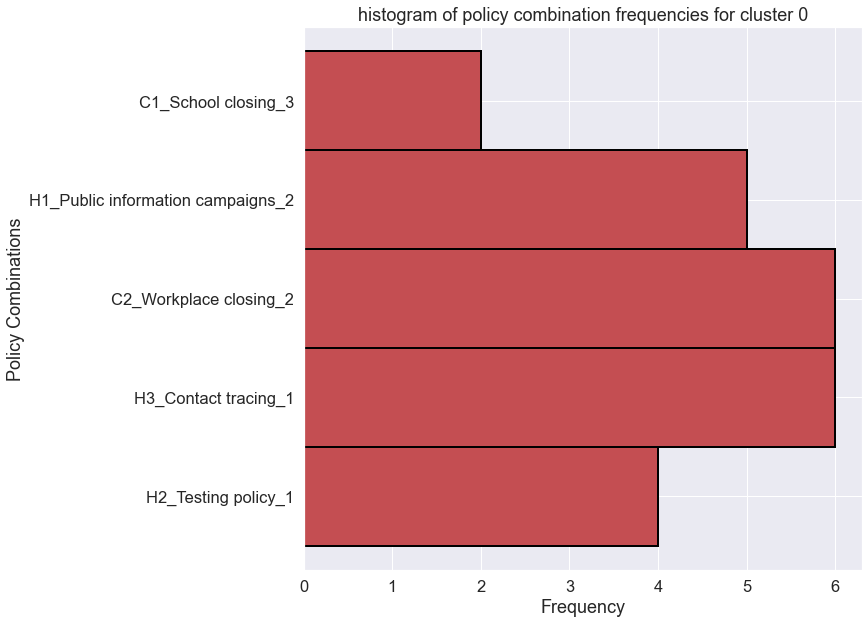

***
***
***
start of cluster 1
No policy combinations for cluster 1 !
***
***
***
start of cluster 2


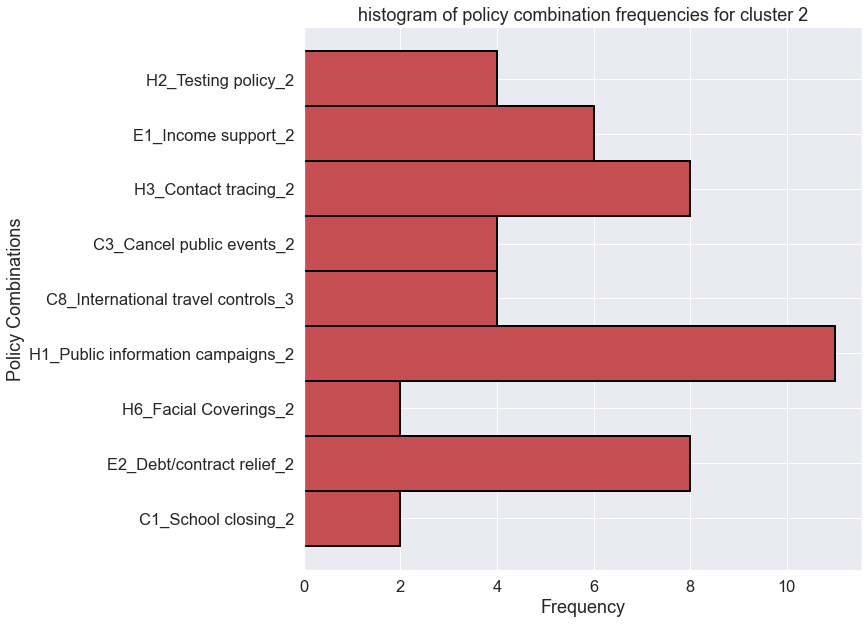

In [27]:
from collections import Counter
for i in range(3):
    print('***\n***\n***')
    print('start of cluster '+str(i))
    hist = draw.loc[draw['cluster']==i] #filter records with cluster i 
    hist = hist.drop(['cluster'],axis=1) #now we don't need cluster attr
    if(len(hist)==0):
        print('No policy combinations for cluster '+str(i)+' !')
    else:
        policies_to_plot = []
        for j in range(len(hist)):
            temp_list = hist['policy'].iloc[j]
            for p in range(len(temp_list)):
                policies_to_plot.append(temp_list[p])
        policy_count = Counter(policies_to_plot)
        #error = np.random.rand(len(keys))
        fig,axs = plt.subplots(figsize = (10,10))
        axs.set_title('histogram of policy combination frequencies for cluster '+ str(i))
        axs.set_ylabel('Policy Combinations')
        axs.set_xlabel('Frequency')
        plt.barh(list(policy_count.keys()),policy_count.values(),1, color='r',edgecolor = 'black',linewidth = 2)
        plt.show()

# Task 3

In [28]:
# Create dataframe "Symptoms" for covid_train.csv
Symptoms = pd.read_csv("covid_train.csv")
Symptoms = Symptoms.iloc[:,51:64]

# Create another identicial dataframe "Draft" as "Symptoms"
Draft = Symptoms

Symptoms

,pct_fever_weighted,pct_cough_weighted,pct_difficulty_breathing_weighted,pct_fatigue_weighted,pct_stuffy_runny_nose_weighted,pct_aches_muscle_pain_weighted,pct_sore_throat_weighted,pct_chest_pain_weighted,pct_nausea_weighted,pct_anosmia_ageusia_weighted,pct_eye_pain_weighted,pct_headache_weighted,pct_chills_weighted
0,4.560000,9.520000,2.773333,29.513333,18.153333,15.073333,11.236667,3.540000,5.223333,4.540000,9.256667,23.050000,4.896667
1,0.390000,4.666667,1.850000,13.816667,9.396667,9.716667,3.023333,1.566667,1.973333,0.706667,3.583333,10.903333,1.056667
2,1.193333,9.470000,3.346667,18.290000,17.850000,16.376667,6.180000,2.873333,4.343333,1.353333,4.053333,15.090000,2.696667
3,8.540000,19.870000,9.306667,21.016667,30.500000,19.906667,23.800000,13.120000,9.416667,9.750000,19.383333,34.513333,12.810000
4,0.820000,9.893333,4.000000,29.410000,13.190000,12.703333,5.273333,2.783333,4.223333,1.110000,3.950000,14.576667,1.053333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3859,4.493333,15.013333,5.843333,35.160000,20.000000,13.730000,9.140000,4.716667,5.003333,3.096667,6.976667,18.783333,4.520000
3860,1.426667,5.203333,2.260000,10.830000,7.666667,15.543333,3.243333,1.736667,1.713333,0.990000,5.993333,8.700000,0.716667
3861,0.893333,6.920000,0.610000,7.480000,9.666667,8.563333,5.210000,1.306667,1.633333,0.386667,3.193333,8.093333,0.813333
3862,1.726667,7.833333,3.096667,8.726667,12.143333,12.280000,8.446667,3.746667,5.246667,1.760000,8.440000,23.426667,3.273333


In [29]:
# For each attribute, if the record’s original value is less than the attribute’s median value, set it to 0; otherwise, set it to 1
for i in Symptoms.columns:
    Symptoms[i] = pd.qcut(Draft[i], q=2, labels=[0, 1])
Symptoms

,pct_fever_weighted,pct_cough_weighted,pct_difficulty_breathing_weighted,pct_fatigue_weighted,pct_stuffy_runny_nose_weighted,pct_aches_muscle_pain_weighted,pct_sore_throat_weighted,pct_chest_pain_weighted,pct_nausea_weighted,pct_anosmia_ageusia_weighted,pct_eye_pain_weighted,pct_headache_weighted,pct_chills_weighted
0,1,0,0,1,1,1,1,0,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,1,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3859,1,1,1,1,1,0,1,1,1,1,0,1,1
3860,0,0,0,0,0,1,0,0,0,0,0,0,0
3861,0,0,0,0,0,0,0,0,0,0,0,0,0
3862,0,0,0,0,0,0,1,0,1,0,1,1,0


In [30]:
# Create dataframe "Case" for total cases and pop total
Case = pd.read_csv("covid_train.csv")
Case = Case[['pop_total', 'total_cases']]
Case

,pop_total,total_cases
0,6456900,3151
1,60297396,239706
2,37589262,131495
3,11513100,45565
4,8877067,23875
...,...,...
3859,144373535,975576
3860,69625582,3216
3861,126264931,27029
3862,50339443,26688


In [31]:
# Calculate the total number of cases in percentage of population
Case['case'] = 100*Case['total_cases']/Case['pop_total']
data = Case
Case

,pop_total,total_cases,case
0,6456900,3151,0.048801
1,60297396,239706,0.397540
2,37589262,131495,0.349821
3,11513100,45565,0.395767
4,8877067,23875,0.268951
...,...,...,...
3859,144373535,975576,0.675730
3860,69625582,3216,0.004619
3861,126264931,27029,0.021407
3862,50339443,26688,0.053016


In [32]:
# considered high if it is larger than or equal to the corresponding median
for i in Case.columns:
    Case[i] = pd.qcut(data[i], q=2, labels=[0, 1])
    
Case = Case.drop(["total_cases"],axis=1)
Case = Case.drop(["pop_total"],axis=1)
Case

,case
0,0
1,1
2,1
3,1
4,1
...,...
3859,1
3860,0
3861,0
3862,0


In [33]:
# Merge two dataframe "Symptoms" and "Case"
Final = pd.concat([Symptoms, Case], axis=1, sort=False)
Final

,pct_fever_weighted,pct_cough_weighted,pct_difficulty_breathing_weighted,pct_fatigue_weighted,pct_stuffy_runny_nose_weighted,pct_aches_muscle_pain_weighted,pct_sore_throat_weighted,pct_chest_pain_weighted,pct_nausea_weighted,pct_anosmia_ageusia_weighted,pct_eye_pain_weighted,pct_headache_weighted,pct_chills_weighted,case
0,1,0,0,1,1,1,1,0,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,1,0,0,0,0,0,0,0,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,1,1,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3859,1,1,1,1,1,0,1,1,1,1,0,1,1,1
3860,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3861,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3862,0,0,0,0,0,0,1,0,1,0,1,1,0,0


a) Extract all symptom combinations that appear in at least 20% of all the records.

In [34]:
# Symptom combination
apriori(Symptoms, min_support=0.2, use_colnames=True)

,support,itemsets
0,0.499224,(pct_fever_weighted)
1,0.5,(pct_cough_weighted)
2,0.499224,(pct_difficulty_breathing_weighted)
3,0.499482,(pct_fatigue_weighted)
4,0.499741,(pct_stuffy_runny_nose_weighted)
...,...,...
2300,0.216615,"(pct_anosmia_ageusia_weighted, pct_eye_pain_we..."
2301,0.200052,"(pct_anosmia_ageusia_weighted, pct_eye_pain_we..."
2302,0.202381,"(pct_anosmia_ageusia_weighted, pct_eye_pain_we..."
2303,0.204193,"(pct_anosmia_ageusia_weighted, pct_eye_pain_we..."


b) Define the total number of cases in percentage of population as: total cases / pop total × 100. This is considered high if it is larger than or equal to the corresponding median. Among all the symptom combinations obtained in part (a) above, find those that appear in at least 60% of all records and have high total number of cases in percentage of population.

In [35]:
# ues dataframe Final which contain both symptoms and case
A = apriori(Final, min_support=0.2, use_colnames=True)

In [36]:
# Symptom combinations which have 60% of all records and have high total number of cases in percentage of population
from mlxtend.frequent_patterns import association_rules
rules = association_rules(A, metric="confidence", min_threshold=0.6)
B = rules[rules['consequents'] == {'case'}]
B

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
60,(pct_difficulty_breathing_weighted),(case),0.499224,0.5,0.302536,0.606013,1.212027,0.052924,1.269079
74,(pct_stuffy_runny_nose_weighted),(case),0.499741,0.5,0.327899,0.656137,1.312273,0.078028,1.454066
436,"(pct_difficulty_breathing_weighted, pct_cough_...",(case),0.361801,0.5,0.240683,0.665236,1.330472,0.059783,1.493590
468,"(pct_stuffy_runny_nose_weighted, pct_cough_wei...",(case),0.386646,0.5,0.263975,0.682731,1.365462,0.070652,1.575949
495,"(pct_aches_muscle_pain_weighted, pct_cough_wei...",(case),0.361284,0.5,0.219720,0.608166,1.216332,0.039079,1.276051
516,"(pct_sore_throat_weighted, pct_cough_weighted)",(case),0.360507,0.5,0.226190,0.627423,1.254846,0.045937,1.342004
625,"(pct_stuffy_runny_nose_weighted, pct_difficult...",(case),0.355331,0.5,0.247930,0.697742,1.395484,0.070264,1.654217
649,"(pct_aches_muscle_pain_weighted, pct_difficult...",(case),0.352226,0.5,0.223085,0.633358,1.266716,0.046972,1.363727
681,"(pct_difficulty_breathing_weighted, pct_sore_t...",(case),0.359990,0.5,0.220756,0.613228,1.226456,0.040761,1.292751
720,"(pct_difficulty_breathing_weighted, pct_nausea...",(case),0.352743,0.5,0.216097,0.612619,1.225238,0.039726,1.290720


In [37]:
# combinations of symptoms
B["antecedents"]

60                    (pct_difficulty_breathing_weighted)
74                       (pct_stuffy_runny_nose_weighted)
436     (pct_difficulty_breathing_weighted, pct_cough_...
468     (pct_stuffy_runny_nose_weighted, pct_cough_wei...
495     (pct_aches_muscle_pain_weighted, pct_cough_wei...
516        (pct_sore_throat_weighted, pct_cough_weighted)
625     (pct_stuffy_runny_nose_weighted, pct_difficult...
649     (pct_aches_muscle_pain_weighted, pct_difficult...
681     (pct_difficulty_breathing_weighted, pct_sore_t...
720     (pct_difficulty_breathing_weighted, pct_nausea...
745     (pct_chills_weighted, pct_difficulty_breathing...
816     (pct_aches_muscle_pain_weighted, pct_stuffy_ru...
837     (pct_stuffy_runny_nose_weighted, pct_sore_thro...
867     (pct_stuffy_runny_nose_weighted, pct_nausea_we...
2922    (pct_stuffy_runny_nose_weighted, pct_difficult...
3269    (pct_aches_muscle_pain_weighted, pct_stuffy_ru...
3334    (pct_stuffy_runny_nose_weighted, pct_sore_thro...
Name: antecede

c) Let S0 be the set of symptoms occurring the combinations obtained from part (b) above. Draw a histogram for the number of symptom combinations each symptom in S0 occurs in.

In [38]:
# list all the symptoms in the symptom combination in part b)
C = B["antecedents"].apply(lambda x: ','.join(list(x))).astype("unicode")
sets=[C]
h = [list(x) for x in sets]
h = h[0]

symp_list = []
for i in range(B["antecedents"].shape[0]):
    book = h[i].split(",")
    symp_list.append(book)

list2 = []
for x in symp_list:
    list2 += x if type(x) == list else [x]
print(list2)

['pct_difficulty_breathing_weighted', 'pct_stuffy_runny_nose_weighted', 'pct_difficulty_breathing_weighted', 'pct_cough_weighted', 'pct_stuffy_runny_nose_weighted', 'pct_cough_weighted', 'pct_aches_muscle_pain_weighted', 'pct_cough_weighted', 'pct_sore_throat_weighted', 'pct_cough_weighted', 'pct_stuffy_runny_nose_weighted', 'pct_difficulty_breathing_weighted', 'pct_aches_muscle_pain_weighted', 'pct_difficulty_breathing_weighted', 'pct_difficulty_breathing_weighted', 'pct_sore_throat_weighted', 'pct_difficulty_breathing_weighted', 'pct_nausea_weighted', 'pct_chills_weighted', 'pct_difficulty_breathing_weighted', 'pct_aches_muscle_pain_weighted', 'pct_stuffy_runny_nose_weighted', 'pct_stuffy_runny_nose_weighted', 'pct_sore_throat_weighted', 'pct_stuffy_runny_nose_weighted', 'pct_nausea_weighted', 'pct_stuffy_runny_nose_weighted', 'pct_difficulty_breathing_weighted', 'pct_cough_weighted', 'pct_aches_muscle_pain_weighted', 'pct_stuffy_runny_nose_weighted', 'pct_cough_weighted', 'pct_stuff

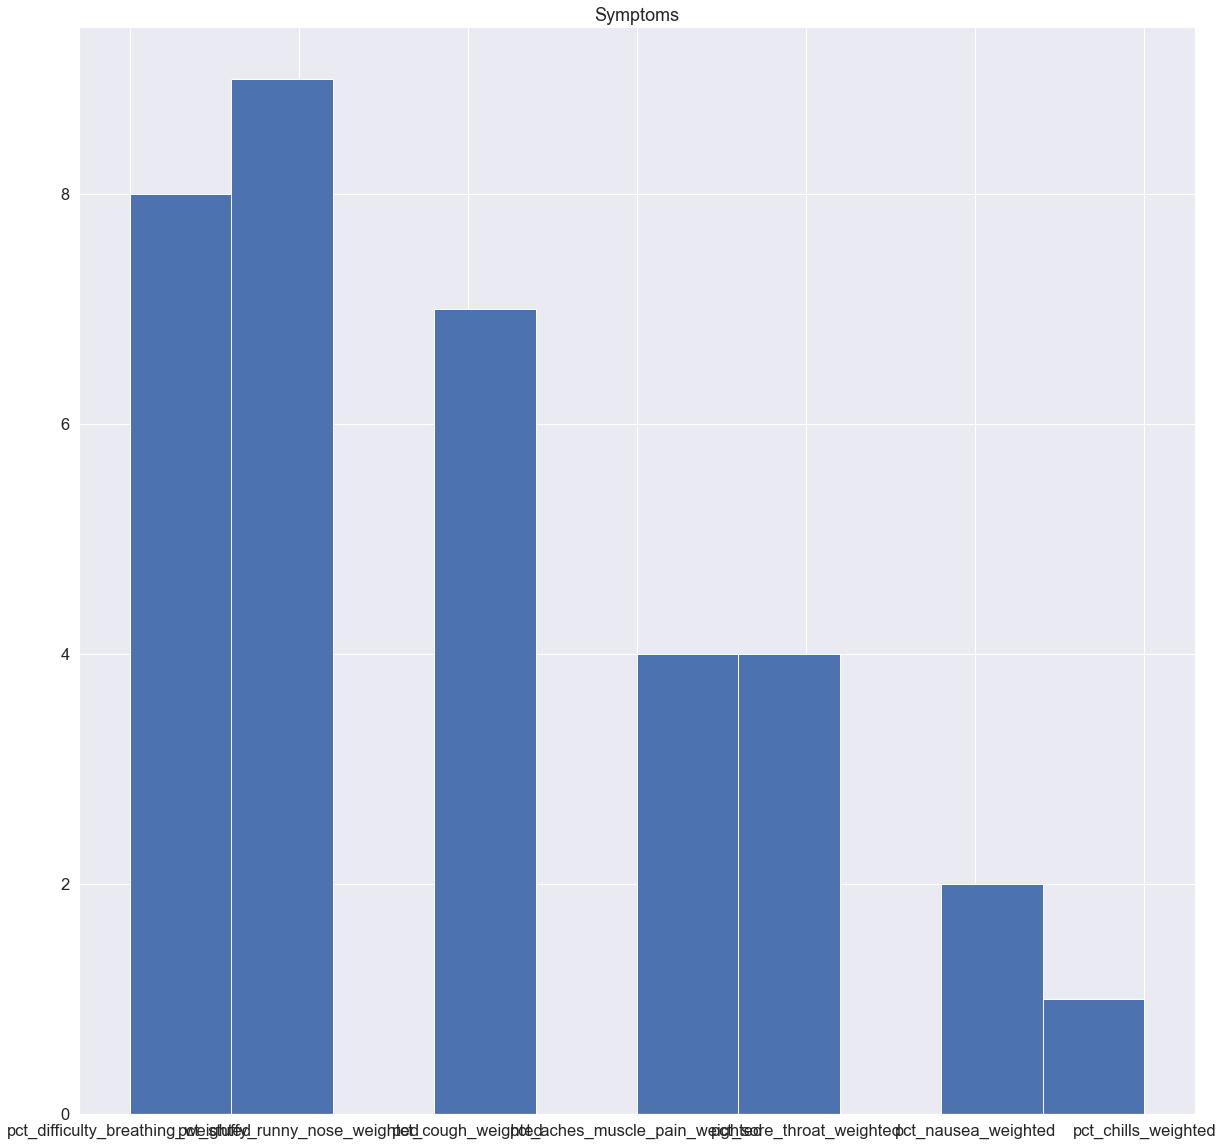

In [39]:
# Plot histogram for Symptom combinations
plt.figure(figsize=(20,20))
plt.hist(list2)
plt.title("Symptoms")
plt.show()

# Task 4

(3864, 12)


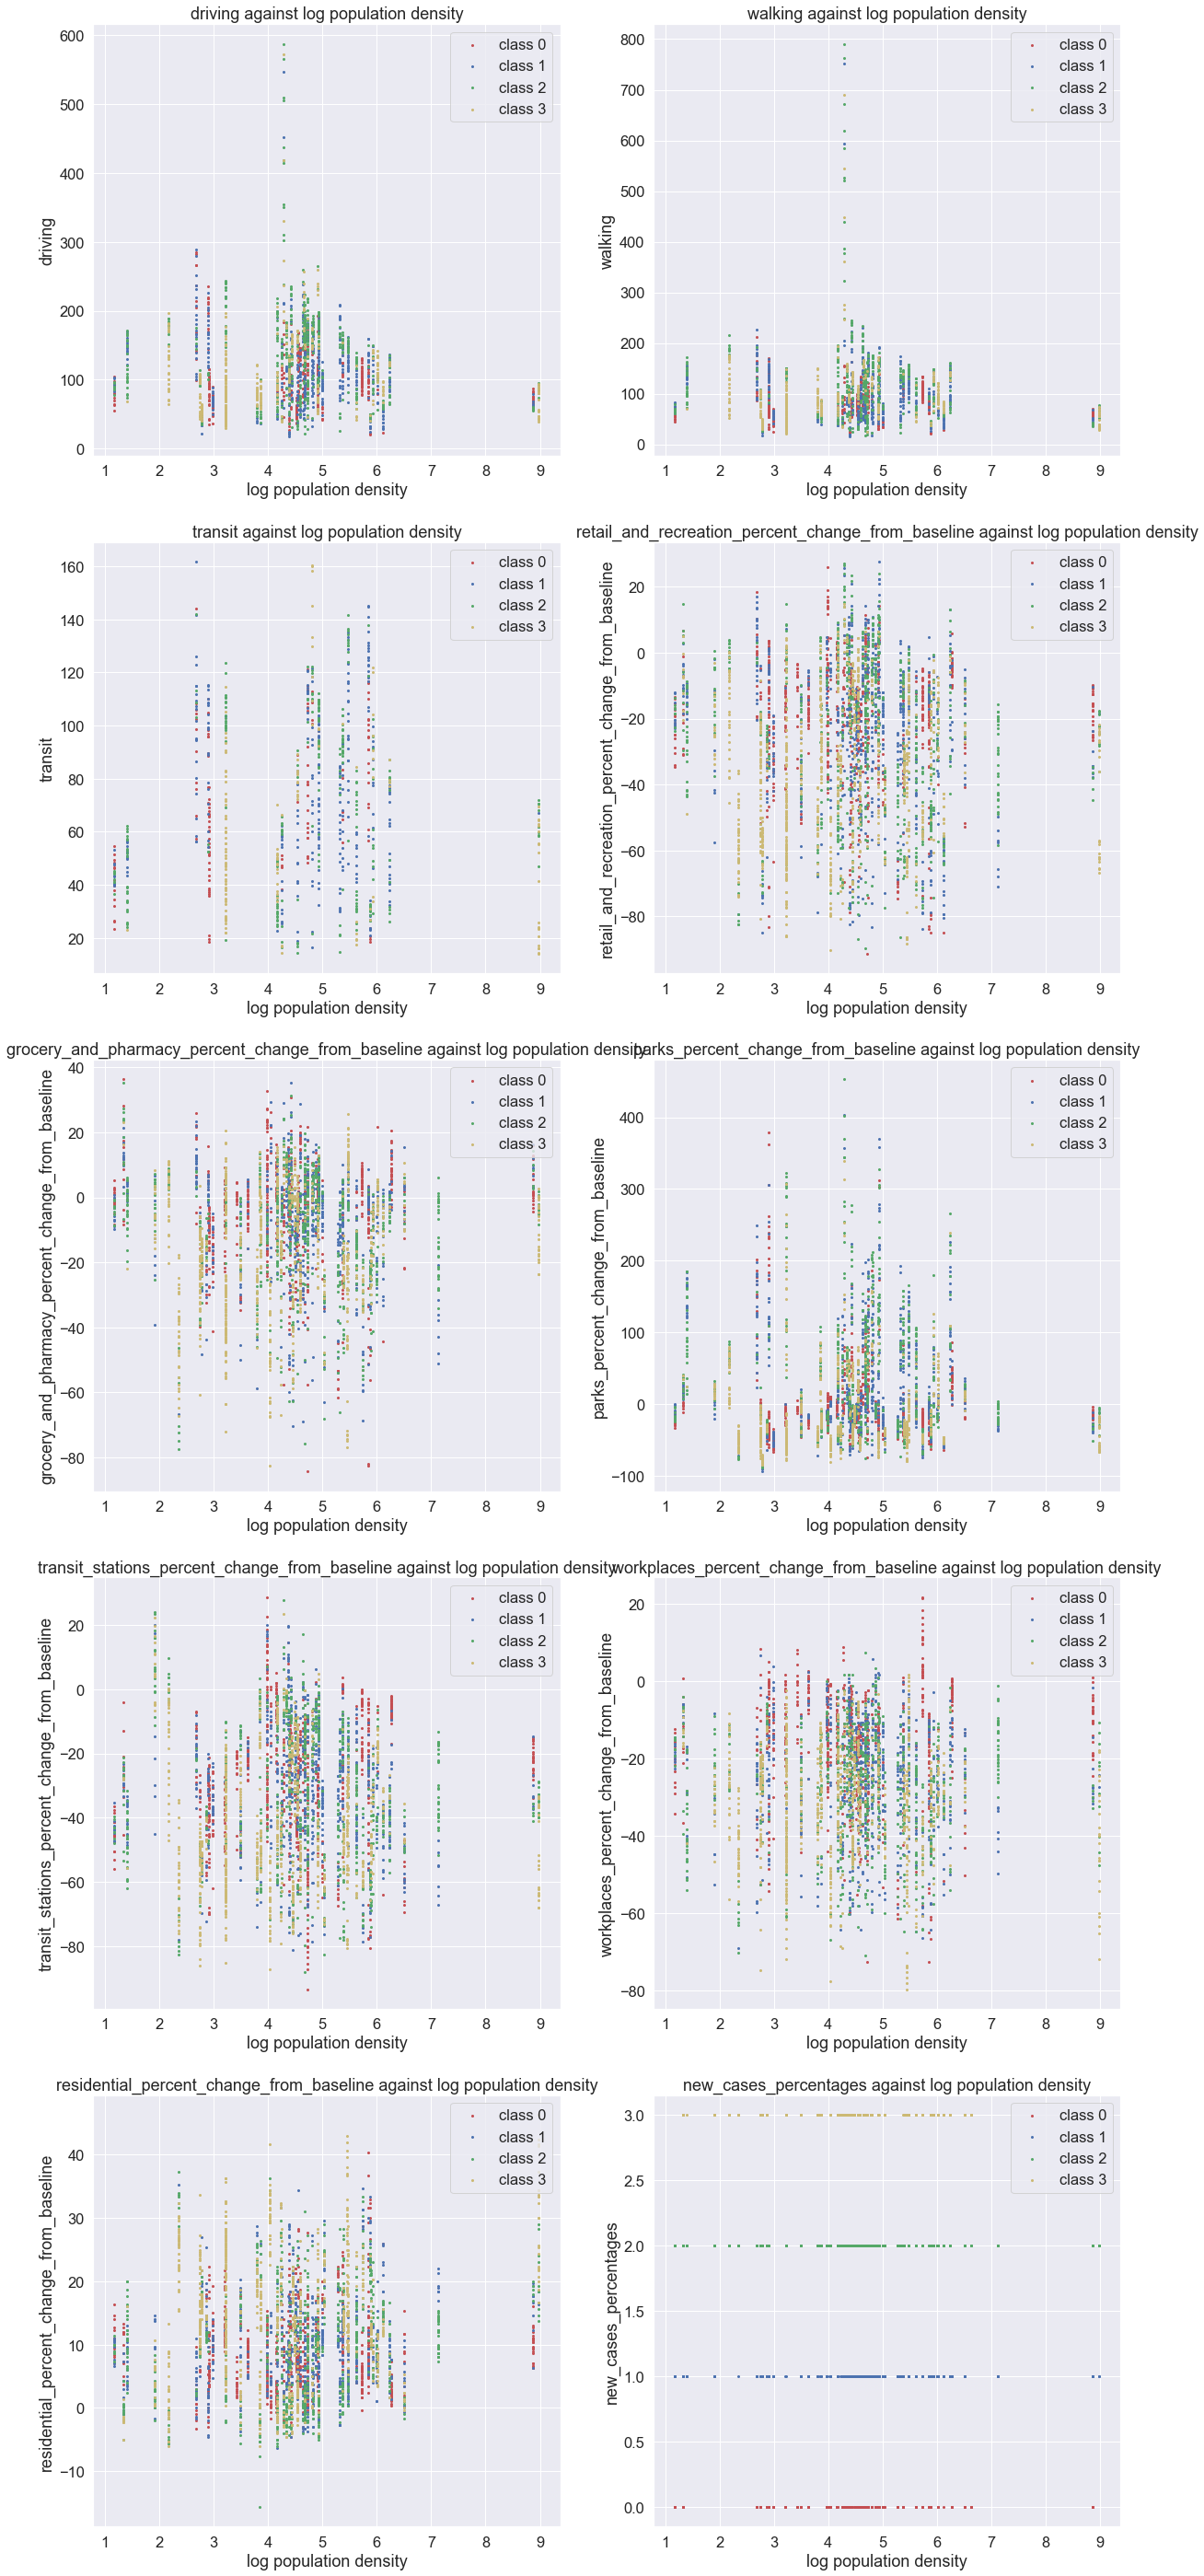

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import warnings as wn
#numpy.set_printoptions(threshold = sys.maxsize)
data = pd.read_csv('covid_train.csv')
q4_attr = ['pop_density','driving','walking','transit','retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline','new_cases_percentages']
q4_plot_attr = ['driving','walking','transit','retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline','new_cases_percentages']
mobility_data = ['driving','walking','transit','retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline']
q4_data = pd.DataFrame()
for i in q4_attr:
    q4_data[i] = data[i]
q4_data['log_pop'] = np.log(q4_data['pop_density'])
print(q4_data.shape)
wn.filterwarnings('ignore')
fig,axs = plt.subplots(5,2 , figsize =(20,50))
row=0
col=0
for i in q4_plot_attr:
    class_0 = q4_data.loc[q4_data['new_cases_percentages']==0]
    class_1 = q4_data.loc[q4_data['new_cases_percentages']==1]
    class_2 = q4_data.loc[q4_data['new_cases_percentages']==2]
    class_3 = q4_data.loc[q4_data['new_cases_percentages']==3]
    axs[row][col].scatter(class_0['log_pop'],class_0[i],color='r',s=4,label = 'class 0')
    axs[row][col].scatter(class_1['log_pop'],class_1[i],color='b',s=4,label = 'class 1')
    axs[row][col].scatter(class_2['log_pop'],class_2[i],color='g',s=4,label = 'class 2')
    axs[row][col].scatter(class_3['log_pop'],class_3[i],color='y',s=4,label = 'class 3')
    axs[row][col].title.set_text(str(i)+' against log population density')
    axs[row][col].set_ylabel(str(i))
    axs[row][col].set_xlabel('log population density')
    axs[row][col].legend(loc="upper right")
    if col <1:
        col = col+1
    else:
        col=0
        row = row+1
plt.show()

In [41]:
q4b_data = q4_data.drop(['log_pop'],axis=1)
#q4b_data = q4b_data.dropna(subset=['pop_density'],axis=0)
print('shape of q4b_data:')
print(q4b_data.shape)
print('quantiles of q4b_data:')
print(q4b_data['pop_density'].quantile([0,0.2,0.4,0.6,0.8,1]))
print('\n')
def between(data,attr,a,b):
    if b ==1:
        temp = data.loc[data[attr]<=data[attr].quantile(b)]
        temp = temp.loc[temp[attr]>=data[attr].quantile(a)]
        print('shape of this quantile')
        print(temp.shape)
        return temp
    temp = data.loc[data[attr]<data[attr].quantile(b)]
    temp = temp.loc[temp[attr]>=data[attr].quantile(a)]
    print('shape of this quantile')
    print(temp.shape)
    return temp
q4b_1 = between(q4b_data,'pop_density',0,0.2)
q4b_2 = between(q4b_data,'pop_density',0.2,0.4)
q4b_3 = between(q4b_data,'pop_density',0.4,0.6)
q4b_4 = between(q4b_data,'pop_density',0.6,0.8)
q4b_5 = between(q4b_data,'pop_density',0.8,1)
def top_corr(data,attr,name):
    print('\n')
    print('Computing top 5 attributes that are most correlated to new_cases_percentages for '+str(name)+' quantile')
    data = data.drop(['pop_density'],axis=1)
    correlation_matrix = data.corr()
    correlation_matrix = correlation_matrix.drop(['new_cases_percentages'],axis=0)
    correlation_matrix = correlation_matrix.iloc[(-correlation_matrix['new_cases_percentages'].abs()).argsort()]
    five_attr = pd.DataFrame()
    five_attr = correlation_matrix['new_cases_percentages'].iloc[0:5]
    print(five_attr)
    print('\n')
top_corr(q4b_1,mobility_data,'1st')
top_corr(q4b_2,mobility_data,'2nd')
top_corr(q4b_3,mobility_data,'3rd')
top_corr(q4b_4,mobility_data,'4th')
top_corr(q4b_5,mobility_data,'5th')

shape of q4b_data:
(3864, 11)
quantiles of q4b_data:
0.0       3.247871
0.2      30.595784
0.4      77.470851
0.6     107.981487
0.8     235.253514
1.0    7952.998418
Name: pop_density, dtype: float64


shape of this quantile
(761, 11)
shape of this quantile
(747, 11)
shape of this quantile
(766, 11)
shape of this quantile
(788, 11)
shape of this quantile
(766, 11)


Computing top 5 attributes that are most correlated to new_cases_percentages for 1st quantile
retail_and_recreation_percent_change_from_baseline   -0.399610
workplaces_percent_change_from_baseline              -0.399349
grocery_and_pharmacy_percent_change_from_baseline    -0.339602
residential_percent_change_from_baseline              0.316531
driving                                              -0.216457
Name: new_cases_percentages, dtype: float64




Computing top 5 attributes that are most correlated to new_cases_percentages for 2nd quantile
workplaces_percent_change_from_baseline              -0.476512
transit_stations

In [42]:
# Task 5 1st analysis

In [43]:
# Symptoms for CLUSTER 0 COUNTRY GROUP
import numpy as np
covid = pd.read_csv('covid_train.csv')
mu = np.array(cluster_0_data['country_name'].values.tolist())
df = pd.DataFrame()
df = covid.loc[covid['country_name'].isin(mu)]
df = df.drop_duplicates(subset=['country_name'])
df = df.iloc[:,51:64]
df

,pct_fever_weighted,pct_cough_weighted,pct_difficulty_breathing_weighted,pct_fatigue_weighted,pct_stuffy_runny_nose_weighted,pct_aches_muscle_pain_weighted,pct_sore_throat_weighted,pct_chest_pain_weighted,pct_nausea_weighted,pct_anosmia_ageusia_weighted,pct_eye_pain_weighted,pct_headache_weighted,pct_chills_weighted
3,8.540000,19.870000,9.306667,21.016667,30.500000,19.906667,23.800000,13.120000,9.416667,9.750000,19.383333,34.513333,12.810000
40,2.146667,6.090000,2.293333,10.130000,9.630000,12.093333,9.510000,3.456667,6.303333,2.156667,9.153333,22.490000,3.910000
48,1.743333,8.453333,3.296667,15.006667,10.693333,14.713333,5.226667,1.060000,3.356667,3.323333,12.650000,8.416667,1.673333
60,5.460000,15.880000,6.343333,18.736667,26.023333,19.263333,20.450000,10.193333,7.640000,6.143333,14.986667,9.013333,21.983333
69,8.653333,9.753333,5.916667,12.836667,12.656667,12.313333,8.696667,5.836667,2.923333,2.543333,11.023333,17.100000,2.793333
75,3.356667,5.436667,3.833333,6.693333,7.740000,10.816667,5.050000,4.263333,3.203333,2.393333,6.153333,12.050000,6.116667
255,5.310000,15.426667,5.583333,17.210000,21.436667,16.806667,15.460000,8.210000,10.573333,7.350000,12.740000,31.233333,7.616667
311,0.786667,7.536667,0.633333,5.043333,4.756667,15.843333,5.130000,2.636667,1.253333,0.770000,11.233333,14.480000,0.000000
683,4.406667,13.573333,1.570000,38.963333,7.133333,19.036667,5.226667,8.060000,3.376667,3.190000,5.623333,20.530000,1.886667
767,5.450000,7.226667,3.280000,32.576667,10.813333,11.270000,4.003333,3.490000,1.903333,7.166667,2.420000,18.406667,4.206667


In [44]:
# Include the 7 symptoms extracted in task 3c
df = Symptoms.loc[[3,40,48,60,69,75,255,311,683,767]]
list2 = list(dict.fromkeys(list2))
df = df[list2]
df

,pct_difficulty_breathing_weighted,pct_stuffy_runny_nose_weighted,pct_cough_weighted,pct_aches_muscle_pain_weighted,pct_sore_throat_weighted,pct_nausea_weighted,pct_chills_weighted
3,1,1,1,1,1,1,1
40,0,0,0,0,1,1,1
48,0,0,0,1,0,0,0
60,1,1,1,1,1,1,1
69,1,0,1,0,1,0,0
75,0,0,0,0,0,0,1
255,1,1,1,1,1,1,1
311,0,0,0,1,0,0,0
683,0,0,1,1,0,0,0
767,0,0,0,0,0,0,1


In [45]:
# Frequency of the 7 symtpoms for cluster 0 country group
df = df.apply(pd.value_counts)
df = df.iloc[1]
df

pct_difficulty_breathing_weighted    4
pct_stuffy_runny_nose_weighted       3
pct_cough_weighted                   5
pct_aches_muscle_pain_weighted       6
pct_sore_throat_weighted             5
pct_nausea_weighted                  4
pct_chills_weighted                  6
Name: 1, dtype: int64

In [46]:
# Average symptoms per country in cluster 0
df.sum()/10

3.3

In [47]:
# CLUSTER 0 COUNTRY GROUP related covid-19 policy to international mobility, income support and public education
import numpy as np
covid = pd.read_csv('covid_train.csv')
mu = np.array(cluster_0_data['country_name'].values.tolist())
df = pd.DataFrame()
df = covid.loc[covid['country_name'].isin(mu)]
df = df.drop_duplicates(subset=['country_name'])
df = df.iloc[:,28:38]
df

,C8_International travel controls_1,C8_International travel controls_2,C8_International travel controls_3,C8_International travel controls_4,E1_Income support_1,E1_Income support_2,E2_Debt/contract relief_1,E2_Debt/contract relief_2,H1_Public information campaigns_1,H1_Public information campaigns_2
3,0,0,0,1,1,0,0,0,0,1
40,0,0,0,1,1,0,0,1,0,1
48,0,1,0,0,0,0,1,0,0,1
60,0,0,0,1,1,0,0,1,0,1
69,0,1,0,0,0,0,0,0,0,1
75,0,0,1,0,0,0,0,0,0,1
255,0,1,0,0,0,0,0,0,0,1
311,0,0,0,1,1,0,0,1,0,1
683,0,0,0,0,1,0,0,1,0,1
767,0,0,0,1,1,0,1,0,0,1


In [48]:
# Frequency of the policies implemented for cluster 0
df = df.apply(pd.value_counts)
df = df.iloc[1]
df

C8_International travel controls_1     NaN
C8_International travel controls_2     3.0
C8_International travel controls_3     1.0
C8_International travel controls_4     5.0
E1_Income support_1                    6.0
E1_Income support_2                    NaN
E2_Debt/contract relief_1              2.0
E2_Debt/contract relief_2              4.0
H1_Public information campaigns_1      NaN
H1_Public information campaigns_2     10.0
Name: 1, dtype: float64

In [49]:
# Symptoms for CLUSTER 1 COUNTRY GROUP
import numpy as np
covid = pd.read_csv('covid_train.csv')
mu = np.array(cluster_1_data['country_name'].values.tolist())
df1 = pd.DataFrame()
df1 = covid.loc[covid['country_name'].isin(mu)]
df1 = df1.drop_duplicates(subset=['country_code'])
df1 = df1.iloc[:,51:64]
df1

,pct_fever_weighted,pct_cough_weighted,pct_difficulty_breathing_weighted,pct_fatigue_weighted,pct_stuffy_runny_nose_weighted,pct_aches_muscle_pain_weighted,pct_sore_throat_weighted,pct_chest_pain_weighted,pct_nausea_weighted,pct_anosmia_ageusia_weighted,pct_eye_pain_weighted,pct_headache_weighted,pct_chills_weighted
0,4.560000,9.520000,2.773333,29.513333,18.153333,15.073333,11.236667,3.540000,5.223333,4.540000,9.256667,23.050000,4.896667
8,1.590000,10.343333,3.726667,27.403333,16.726667,13.003333,5.860000,4.196667,3.456667,1.596667,7.423333,19.716667,3.010000
9,3.763333,8.740000,4.506667,28.206667,11.233333,21.340000,8.030000,4.700000,5.010000,3.176667,12.190000,24.133333,3.876667
10,4.960000,13.986667,6.453333,18.076667,16.153333,20.040000,10.440000,6.430000,7.516667,6.956667,9.896667,23.326667,6.076667
11,4.066667,12.340000,7.493333,36.593333,18.736667,25.053333,14.676667,9.433333,9.296667,5.646667,14.180000,29.446667,5.070000
12,2.040000,7.443333,3.673333,16.736667,10.740000,15.630000,7.803333,5.380000,2.063333,1.733333,8.670000,20.903333,0.396667
13,3.346667,10.740000,5.016667,15.966667,15.116667,16.516667,11.316667,4.930000,6.773333,3.403333,11.486667,25.196667,4.626667
14,1.800000,8.603333,2.933333,8.713333,11.866667,11.436667,8.740000,3.626667,5.130000,1.883333,8.490000,23.366667,2.660000
16,0.946667,5.073333,2.076667,18.686667,9.830000,8.083333,4.163333,2.056667,2.210000,0.846667,3.906667,13.900000,1.490000
17,2.233333,3.613333,4.103333,21.723333,9.686667,11.883333,4.130000,4.836667,2.410000,1.196667,7.360000,16.843333,3.350000


In [50]:
# Include the 7 symptoms extracted in task 3c
df1 = Symptoms.loc[[0,8,9,10,11,12,13,14,16,17,21,28,30,31,32,41,56,59,62,64,70,72,73,74,79,101,104,105,
                    113,128,147,175,182,223,226,231,247,273,322]]
df1 = df1[list2]
df1

,pct_difficulty_breathing_weighted,pct_stuffy_runny_nose_weighted,pct_cough_weighted,pct_aches_muscle_pain_weighted,pct_sore_throat_weighted,pct_nausea_weighted,pct_chills_weighted
0,0,1,0,1,1,1,1
8,0,1,1,0,0,0,0
9,1,0,0,1,1,1,1
10,1,1,1,1,1,1,1
11,1,1,1,1,1,1,1
12,0,0,0,1,1,0,0
13,1,1,1,1,1,1,1
14,0,0,0,0,1,1,0
16,0,0,0,0,0,0,0
17,1,0,0,0,0,0,1


In [51]:
# Frequency of the 7 symtpoms for cluster 1 country group
df1 = df1.apply(pd.value_counts)
df1 = df1.iloc[1]
df1

pct_difficulty_breathing_weighted    21
pct_stuffy_runny_nose_weighted       17
pct_cough_weighted                   15
pct_aches_muscle_pain_weighted       17
pct_sore_throat_weighted             23
pct_nausea_weighted                  21
pct_chills_weighted                  21
Name: 1, dtype: int64

In [52]:
# Average symptoms per country in cluster 1
df1.sum()/39

3.4615384615384617

In [53]:
# CLUSTER 1 COUNTRY GROUP related covid-19 policy to international mobility, income support and public education
import numpy as np
covid = pd.read_csv('covid_train.csv')
mu = np.array(cluster_1_data['country_name'].values.tolist())
df = pd.DataFrame()
df = covid.loc[covid['country_name'].isin(mu)]
df = df.drop_duplicates(subset=['country_name'])
df = df.iloc[:,28:38]
df

,C8_International travel controls_1,C8_International travel controls_2,C8_International travel controls_3,C8_International travel controls_4,E1_Income support_1,E1_Income support_2,E2_Debt/contract relief_1,E2_Debt/contract relief_2,H1_Public information campaigns_1,H1_Public information campaigns_2
0,0,0,1,0,1,0,1,0,1,0
8,0,0,0,1,1,0,1,0,0,1
9,0,0,0,1,0,0,0,0,0,1
10,0,1,0,0,1,0,0,0,0,1
11,1,0,0,0,1,0,0,1,0,1
12,0,0,0,1,0,1,1,0,0,1
13,0,0,1,0,1,0,1,0,0,1
14,0,0,0,1,1,0,0,1,0,1
16,0,0,0,1,0,0,0,1,0,1
17,0,0,0,1,1,0,0,1,0,1


In [54]:
# Frequency of the policies implemented for cluster 1
df = df.apply(pd.value_counts)
df = df.iloc[1]
df

C8_International travel controls_1     3
C8_International travel controls_2     2
C8_International travel controls_3     7
C8_International travel controls_4    25
E1_Income support_1                   22
E1_Income support_2                    9
E2_Debt/contract relief_1             11
E2_Debt/contract relief_2             20
H1_Public information campaigns_1      3
H1_Public information campaigns_2     36
Name: 1, dtype: int64

In [55]:
# Symptoms for CLUSTER 2 COUNTRY GROUP
import numpy as np
covid = pd.read_csv('covid_train.csv')
mu = np.array(cluster_2_data['country_name'].values.tolist())
df2 = pd.DataFrame()
df2 = covid.loc[covid['country_name'].isin(mu)]
df2 = df2.drop_duplicates(subset=['country_name'])
df2 = df2.iloc[:,51:64]
df2

,pct_fever_weighted,pct_cough_weighted,pct_difficulty_breathing_weighted,pct_fatigue_weighted,pct_stuffy_runny_nose_weighted,pct_aches_muscle_pain_weighted,pct_sore_throat_weighted,pct_chest_pain_weighted,pct_nausea_weighted,pct_anosmia_ageusia_weighted,pct_eye_pain_weighted,pct_headache_weighted,pct_chills_weighted
1,0.390000,4.666667,1.850000,13.816667,9.396667,9.716667,3.023333,1.566667,1.973333,0.706667,3.583333,10.903333,1.056667
2,1.193333,9.470000,3.346667,18.290000,17.850000,16.376667,6.180000,2.873333,4.343333,1.353333,4.053333,15.090000,2.696667
4,0.820000,9.893333,4.000000,29.410000,13.190000,12.703333,5.273333,2.783333,4.223333,1.110000,3.950000,14.576667,1.053333
5,0.440000,7.726667,5.843333,27.523333,15.286667,11.370000,4.036667,2.596667,3.833333,1.090000,6.740000,14.533333,1.620000
6,0.930000,6.683333,2.153333,13.456667,9.456667,11.566667,4.866667,2.443333,2.286667,1.070000,3.686667,10.966667,3.443333
7,2.130000,16.243333,4.753333,19.130000,21.966667,18.063333,8.100000,3.696667,4.963333,2.816667,5.070000,16.936667,4.163333
22,1.070000,8.800000,4.536667,21.993333,18.950000,20.390000,6.580000,3.776667,4.880000,1.613333,5.830000,18.290000,1.780000
35,0.136667,8.706667,3.636667,20.163333,17.873333,7.043333,4.186667,2.343333,0.533333,1.013333,7.246667,15.403333,0.000000
37,0.393333,4.130000,1.383333,13.270000,7.556667,16.176667,4.750000,2.790000,2.926667,1.506667,9.223333,15.826667,2.943333
39,0.850000,9.203333,4.253333,31.180000,16.750000,9.710000,5.866667,3.836667,3.790000,1.233333,8.063333,17.136667,1.673333


In [56]:
# Include the 7 symptoms extracted in task 3c
df2 = Symptoms.loc[[1,2,4,5,6,7,22,35,37,39,44,51,53,55,57,63,77,78,80,115,122,123,138,153,194,297]]
df2 = df2[list2]
df2

,pct_difficulty_breathing_weighted,pct_stuffy_runny_nose_weighted,pct_cough_weighted,pct_aches_muscle_pain_weighted,pct_sore_throat_weighted,pct_nausea_weighted,pct_chills_weighted
1,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0
4,1,0,1,0,0,0,0
5,1,1,0,0,0,0,0
6,0,0,0,0,0,0,1
7,1,1,1,1,1,1,1
22,1,1,0,1,0,1,0
35,0,1,0,0,0,0,0
37,0,0,0,1,0,0,0
39,1,1,0,0,0,0,0


In [57]:
# Frequency of the 7 symtpoms for cluster 2 country group
df2 = df2.apply(pd.value_counts)
df2 = df2.iloc[1]
df2

pct_difficulty_breathing_weighted    13
pct_stuffy_runny_nose_weighted       18
pct_cough_weighted                   11
pct_aches_muscle_pain_weighted       13
pct_sore_throat_weighted              5
pct_nausea_weighted                   5
pct_chills_weighted                   7
Name: 1, dtype: int64

In [58]:
# Average symptoms per country in cluster 2
df2.sum()/26

2.769230769230769

In [59]:
# CLUSTER 2 COUNTRY GROUP related covid-19 policy to international mobility, income support and public education
import numpy as np
covid = pd.read_csv('covid_train.csv')
mu = np.array(cluster_2_data['country_name'].values.tolist())
df = pd.DataFrame()
df = covid.loc[covid['country_name'].isin(mu)]
df = df.drop_duplicates(subset=['country_name'])
df = df.iloc[:,28:38]
df

,C8_International travel controls_1,C8_International travel controls_2,C8_International travel controls_3,C8_International travel controls_4,E1_Income support_1,E1_Income support_2,E2_Debt/contract relief_1,E2_Debt/contract relief_2,H1_Public information campaigns_1,H1_Public information campaigns_2
1,0,1,0,0,1,0,0,1,0,1
2,0,0,1,0,0,1,1,0,0,1
4,0,1,0,0,0,1,0,1,0,1
5,0,0,1,0,0,1,1,0,0,1
6,0,0,1,0,1,0,0,1,0,1
7,0,0,0,1,0,1,0,1,0,1
22,0,1,0,0,0,1,0,1,0,1
35,0,0,0,1,0,1,0,1,0,1
37,0,0,0,1,1,0,1,0,0,1
39,0,0,1,0,1,0,1,0,0,1


In [60]:
# Frequency of the policies implemented for cluster 2
df = df.apply(pd.value_counts)
df = df.iloc[1]
df

C8_International travel controls_1     NaN
C8_International travel controls_2     5.0
C8_International travel controls_3    14.0
C8_International travel controls_4     7.0
E1_Income support_1                    7.0
E1_Income support_2                   18.0
E2_Debt/contract relief_1              9.0
E2_Debt/contract relief_2             15.0
H1_Public information campaigns_1      NaN
H1_Public information campaigns_2     26.0
Name: 1, dtype: float64

In [61]:
#2nd analysis

In [62]:
# CLUSTER 0 COUNTRY GROUP related covid-19 policy on facial mask wearing
covid = pd.read_csv('covid_train.csv')
mu = np.array(cluster_0_data['country_name'].values.tolist())
df = pd.DataFrame()
df = covid.loc[covid['country_name'].isin(mu)]
df = df.drop_duplicates(subset=['country_name'])
df = df.iloc[:,43:47]
df

,H6_Facial Coverings_1,H6_Facial Coverings_2,H6_Facial Coverings_3,H6_Facial Coverings_4
3,0,0,1,0
40,0,0,1,0
48,0,0,0,1
60,0,0,1,0
69,1,0,0,0
75,0,0,0,1
255,0,0,0,0
311,0,0,0,0
683,0,0,0,0
767,0,0,1,0


In [63]:
# Frequency of each policies on facial mask wearing for cluster 0
df = df.apply(pd.value_counts)
df = df.iloc[1]
df

H6_Facial Coverings_1    1.0
H6_Facial Coverings_2    NaN
H6_Facial Coverings_3    4.0
H6_Facial Coverings_4    2.0
Name: 1, dtype: float64

In [64]:
# CLUSTER 1 COUNTRY GROUP related covid-19 policy on facial mask wearing
covid = pd.read_csv('covid_train.csv')
mu = np.array(cluster_1_data['country_name'].values.tolist())
df = pd.DataFrame()
df = covid.loc[covid['country_name'].isin(mu)]
df = df.drop_duplicates(subset=['country_name'])
df = df.iloc[:,43:47]
df

,H6_Facial Coverings_1,H6_Facial Coverings_2,H6_Facial Coverings_3,H6_Facial Coverings_4
0,0,0,1,0
8,0,0,1,0
9,0,0,0,0
10,0,0,1,0
11,0,1,0,0
12,0,0,0,1
13,0,1,0,0
14,0,0,0,1
16,0,0,1,0
17,0,0,0,1


In [65]:
# Frequency of each policies on facial mask wearing for cluster 1
df = df.apply(pd.value_counts)
df = df.iloc[1]
df

H6_Facial Coverings_1     1
H6_Facial Coverings_2     9
H6_Facial Coverings_3    16
H6_Facial Coverings_4     6
Name: 1, dtype: int64

In [66]:
# CLUSTER 2 COUNTRY GROUP related covid-19 policy on facial mask wearing
covid = pd.read_csv('covid_train.csv')
mu = np.array(cluster_2_data['country_name'].values.tolist())
df = pd.DataFrame()
df = covid.loc[covid['country_name'].isin(mu)]
df = df.drop_duplicates(subset=['country_name'])
df = df.iloc[:,43:47]
df

,H6_Facial Coverings_1,H6_Facial Coverings_2,H6_Facial Coverings_3,H6_Facial Coverings_4
1,0,0,0,1
2,0,0,1,0
4,0,1,0,0
5,0,1,0,0
6,0,1,0,0
7,0,0,0,0
22,0,0,0,0
35,0,0,1,0
37,0,0,1,0
39,0,1,0,0


In [67]:
# Frequency of each policies on facial mask wearing for cluster 2
df = df.apply(pd.value_counts)
df = df.iloc[1]
df

H6_Facial Coverings_1     1
H6_Facial Coverings_2    10
H6_Facial Coverings_3     5
H6_Facial Coverings_4     2
Name: 1, dtype: int64

In [68]:
# 3rd analysis

In [69]:
# CLUSTER 0 COUNTRY GROUP effective policy
covid = pd.read_csv('covid_train.csv')
mu = np.array(cluster_0_data['country_name'].values.tolist())
df = pd.DataFrame()
df = covid.loc[covid['country_name'].isin(mu)]
df = df.drop_duplicates(subset=['country_name'])
df = df.iloc[:,9:47]
df

,C1_School closing_1,C1_School closing_2,C1_School closing_3,C2_Workplace closing_1,C2_Workplace closing_2,C2_Workplace closing_3,C3_Cancel public events_1,C3_Cancel public events_2,C4_Restrictions on gatherings_1,C4_Restrictions on gatherings_2,...,H1_Public information campaigns_2,H2_Testing policy_1,H2_Testing policy_2,H2_Testing policy_3,H3_Contact tracing_1,H3_Contact tracing_2,H6_Facial Coverings_1,H6_Facial Coverings_2,H6_Facial Coverings_3,H6_Facial Coverings_4
3,0,0,1,0,1,0,0,1,0,0,...,1,1,0,0,1,0,0,0,1,0
40,0,0,1,0,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
48,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
60,0,0,1,0,1,0,0,1,0,0,...,1,1,0,0,0,1,0,0,1,0
69,0,0,1,0,1,0,0,1,0,0,...,1,1,0,0,1,0,1,0,0,0
75,0,1,0,0,1,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,1
255,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
311,0,0,1,0,0,1,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0
683,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
767,0,0,1,1,0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,1,0


In [70]:
# effective policy for cluster 0
df1 = pd.DataFrame()
df1['C1_School closing_3'] = df['C1_School closing_3']
df1['C2_Workplace closing_2'] = df['C2_Workplace closing_2']
df1['C2_Workplace closing_3'] = df['C2_Workplace closing_3']
df1['H1_Public information campaigns_2'] = df['H1_Public information campaigns_2']
df1['H2_Testing policy_1'] = df['H2_Testing policy_1']
df1['H2_Testing policy_2'] = df['H2_Testing policy_2']
df1['H2_Testing policy_3'] = df['H2_Testing policy_3']
df1['H3_Contact tracing_1'] = df['H3_Contact tracing_1']
df1['H3_Contact tracing_2'] = df['H3_Contact tracing_2']
df1

,C1_School closing_3,C2_Workplace closing_2,C2_Workplace closing_3,H1_Public information campaigns_2,H2_Testing policy_1,H2_Testing policy_2,H2_Testing policy_3,H3_Contact tracing_1,H3_Contact tracing_2
3,1,1,0,1,1,0,0,1,0
40,1,0,1,1,0,1,0,0,0
48,0,0,0,1,1,0,0,0,1
60,1,1,0,1,1,0,0,0,1
69,1,1,0,1,1,0,0,1,0
75,0,1,0,1,0,1,0,1,0
255,0,0,0,1,1,0,0,0,0
311,1,0,1,1,1,0,0,0,1
683,0,0,0,1,0,0,0,0,1
767,1,0,0,1,1,0,0,0,1


In [71]:
# frequency of the effective policy in cluster 0
df1 = df1.apply(pd.value_counts)
df1 = df1.iloc[1]
df1

C1_School closing_3                   6.0
C2_Workplace closing_2                4.0
C2_Workplace closing_3                2.0
H1_Public information campaigns_2    10.0
H2_Testing policy_1                   7.0
H2_Testing policy_2                   2.0
H2_Testing policy_3                   NaN
H3_Contact tracing_1                  3.0
H3_Contact tracing_2                  5.0
Name: 1, dtype: float64

In [72]:
# average effective policy per country
df1.sum()/10

3.9

In [73]:
# CLUSTER 2 COUNTRY GROUP effective policies
covid = pd.read_csv('covid_train.csv')
mu = np.array(cluster_2_data['country_name'].values.tolist())
df = pd.DataFrame()
df = covid.loc[covid['country_name'].isin(mu)]
df = df.drop_duplicates(subset=['country_name'])
df = df.iloc[:,9:47]
df

,C1_School closing_1,C1_School closing_2,C1_School closing_3,C2_Workplace closing_1,C2_Workplace closing_2,C2_Workplace closing_3,C3_Cancel public events_1,C3_Cancel public events_2,C4_Restrictions on gatherings_1,C4_Restrictions on gatherings_2,...,H1_Public information campaigns_2,H2_Testing policy_1,H2_Testing policy_2,H2_Testing policy_3,H3_Contact tracing_1,H3_Contact tracing_2,H6_Facial Coverings_1,H6_Facial Coverings_2,H6_Facial Coverings_3,H6_Facial Coverings_4
1,0,0,1,0,1,0,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
2,0,0,1,0,1,0,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
4,0,0,0,1,0,0,1,0,0,1,...,1,0,0,1,0,1,0,1,0,0
5,0,1,0,1,0,0,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0
6,0,0,1,0,1,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
22,0,0,1,0,1,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0
35,0,0,1,0,1,0,0,1,0,0,...,1,1,0,0,0,1,0,0,1,0
37,0,0,1,1,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
39,0,1,0,0,1,0,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0


In [74]:
# the effective policy for cluster 2
df1 = pd.DataFrame()
df1['C1_School closing_2'] = df['C1_School closing_2']
df1['C1_School closing_3'] = df['C1_School closing_3']
df1['C3_Cancel public events_2'] = df['C3_Cancel public events_2']
df1['C8_International travel controls_3'] = df['C8_International travel controls_3']
df1['C8_International travel controls_4'] = df['C8_International travel controls_4']
df1['E1_Income support_2'] = df['E1_Income support_2']
df1['E2_Debt/contract relief_2'] = df['E2_Debt/contract relief_2']
df1['H1_Public information campaigns_2'] = df['H1_Public information campaigns_2']
df1['H2_Testing policy_2'] = df['H2_Testing policy_2']
df1['H2_Testing policy_3'] = df['H2_Testing policy_3']
df1['H3_Contact tracing_2'] = df['H3_Contact tracing_2']
df1['H6_Facial Coverings_2'] = df['H6_Facial Coverings_2']
df1['H6_Facial Coverings_3'] = df['H6_Facial Coverings_3']
df1['H6_Facial Coverings_4'] = df['H6_Facial Coverings_4']
df1

,C1_School closing_2,C1_School closing_3,C3_Cancel public events_2,C8_International travel controls_3,C8_International travel controls_4,E1_Income support_2,E2_Debt/contract relief_2,H1_Public information campaigns_2,H2_Testing policy_2,H2_Testing policy_3,H3_Contact tracing_2,H6_Facial Coverings_2,H6_Facial Coverings_3,H6_Facial Coverings_4
1,0,1,1,0,0,0,1,1,1,0,1,0,0,1
2,0,1,1,1,0,1,0,1,0,1,1,0,1,0
4,0,0,0,0,0,1,1,1,0,1,1,1,0,0
5,1,0,0,1,0,1,0,1,1,0,1,1,0,0
6,0,1,1,1,0,0,1,1,0,1,1,1,0,0
7,0,0,0,0,1,1,1,1,1,0,1,0,0,0
22,0,1,1,0,0,1,1,1,1,0,1,0,0,0
35,0,1,1,0,1,1,1,1,0,0,1,0,1,0
37,0,1,1,0,1,0,0,1,1,0,1,0,1,0
39,1,0,0,1,0,0,0,1,1,0,1,1,0,0


In [75]:
# Frequncy of effective policy
df1 = df1.apply(pd.value_counts)
df1 = df1.iloc[1]
df1

C1_School closing_2                    6.0
C1_School closing_3                   12.0
C3_Cancel public events_2             16.0
C8_International travel controls_3    14.0
C8_International travel controls_4     7.0
E1_Income support_2                   18.0
E2_Debt/contract relief_2             15.0
H1_Public information campaigns_2     26.0
H2_Testing policy_2                   10.0
H2_Testing policy_3                   11.0
H3_Contact tracing_2                  20.0
H6_Facial Coverings_2                 10.0
H6_Facial Coverings_3                  5.0
H6_Facial Coverings_4                  2.0
Name: 1, dtype: float64

In [76]:
# Average effective policy per countries for cluster 2
df1.sum()/26

6.615384615384615

In [77]:
# 4th anakysis

In [78]:
# Extract the Hong Kong’s GDP, safe_water and safe_san value
covid = pd.read_csv('covid_train.csv')
df = pd.DataFrame()
df = covid.iloc[29:30,:]
print("GDP: $" + str(df["GDP"].values.tolist()))
print("Safe_water: " + str(df["safe_water"].values.tolist()))
print("Safe_San: " + str(df["safe_san"].values.tolist()))

GDP: $[62375.11937000001]
Safe_water: [100.0]
Safe_San: [91.77344928]


In [79]:
# Extract the Hong Kong’s policy
covid = pd.read_csv('covid_train.csv')
df = pd.DataFrame()
df = covid.iloc[[29]]
df.iloc[:,9:47]

,C1_School closing_1,C1_School closing_2,C1_School closing_3,C2_Workplace closing_1,C2_Workplace closing_2,C2_Workplace closing_3,C3_Cancel public events_1,C3_Cancel public events_2,C4_Restrictions on gatherings_1,C4_Restrictions on gatherings_2,...,H1_Public information campaigns_2,H2_Testing policy_1,H2_Testing policy_2,H2_Testing policy_3,H3_Contact tracing_1,H3_Contact tracing_2,H6_Facial Coverings_1,H6_Facial Coverings_2,H6_Facial Coverings_3,H6_Facial Coverings_4
29,0,0,1,0,1,0,0,1,0,0,...,1,0,1,0,0,1,1,0,0,0


In [80]:
# HK's effective policies
df1 = pd.DataFrame()
df1['C1_School closing_2'] = df['C1_School closing_2']
df1['C3_Cancel public events_2'] = df['C3_Cancel public events_2']
df1['C8_International travel controls_3'] = df['C8_International travel controls_3']
df1['E1_Income support_2'] = df['E1_Income support_2']
df1['E2_Debt/contract relief_2'] = df['E2_Debt/contract relief_2']
df1['H1_Public information campaigns_2'] = df['H1_Public information campaigns_2']
df1['H2_Testing policy_2'] = df['H2_Testing policy_2']
df1['H3_Contact tracing_2'] = df['H3_Contact tracing_2']
df1['H6_Facial Coverings_2'] = df['H6_Facial Coverings_2']
df1

,C1_School closing_2,C3_Cancel public events_2,C8_International travel controls_3,E1_Income support_2,E2_Debt/contract relief_2,H1_Public information campaigns_2,H2_Testing policy_2,H3_Contact tracing_2,H6_Facial Coverings_2
29,0,1,0,1,1,1,1,1,0


In [81]:
# HK's stricter policies for the above effective policies
df1 = pd.DataFrame()
df1['C1_School closing_3'] = df['C1_School closing_3']
df1['C8_International travel controls_4'] = df['C8_International travel controls_4']
df1['H2_Testing policy_3'] = df['H2_Testing policy_3']
df1['H6_Facial Coverings_3'] = df['H6_Facial Coverings_3']
df1['H6_Facial Coverings_4'] = df['H6_Facial Coverings_4']
df1

,C1_School closing_3,C8_International travel controls_4,H2_Testing policy_3,H6_Facial Coverings_3,H6_Facial Coverings_4
29,1,1,0,0,0


In [82]:
# 5tth analysis

In [83]:
# The equal-sized percentiles of population density computed in task 4b
print('quantiles of population density:')
print(q4b_data['pop_density'].quantile([0,0.2,0.4,0.6,0.8,1]))

quantiles of population density:
0.0       3.247871
0.2      30.595784
0.4      77.470851
0.6     107.981487
0.8     235.253514
1.0    7952.998418
Name: pop_density, dtype: float64


In [84]:
# Extract the Hong Kong’s population density value
covid = pd.read_csv('covid_train.csv')
df = pd.DataFrame()
df = covid.iloc[[29]]
df

,country_name,country_code,pop_total,pop_density,GDP,basic_water,safe_water,basic_san,safe_san,C1_School closing_1,...,transit,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,prev_cases,total_cases,new_cases_percentages
29,Hong Kong,HKG,7507400,7096.190476,62375.11937,100.0,100.0,96.436224,91.773449,0,...,NaN,-17.666667,0.666667,-18.333333,-22.666667,-10.666667,10.333333,1065,1065,0


In [85]:
# Extract the top 5 attributes that are most correlated to “new_cases_percentages” for the 5th quantile (not absolute value)
def top_corr(data,attr,name):
    print('\n')
    print('Computing top 5 attributes that are most correlated to new_cases_percentages for '+str(name)+' quantile')
    data = data.drop(['pop_density'],axis=1)
    correlation_matrix = data.corr()
    correlation_matrix = correlation_matrix.drop(['new_cases_percentages'],axis=0)
    correlation_matrix = correlation_matrix.iloc[(-correlation_matrix['new_cases_percentages']).argsort()]
    five_attr = pd.DataFrame()
    five_attr = correlation_matrix['new_cases_percentages'].iloc[0:5]
    print(five_attr)
    print('\n')
top_corr(q4b_5,mobility_data,'5th')



Computing top 5 attributes that are most correlated to new_cases_percentages for 5th quantile
residential_percent_change_from_baseline             0.292798
driving                                              0.022303
parks_percent_change_from_baseline                  -0.020180
walking                                             -0.021731
grocery_and_pharmacy_percent_change_from_baseline   -0.156423
Name: new_cases_percentages, dtype: float64




In [86]:
# related policy solving the top 2 correlated attributes found above for HK
df1 = pd.DataFrame()
df1 = df.iloc[:,23:28]
df1['H3_Contact tracing_1'] = df['H3_Contact tracing_1']
df1['H3_Contact tracing_2'] = df['H3_Contact tracing_2']
df1

,C6_Stay at home requirements_1,C6_Stay at home requirements_2,C6_Stay at home requirements_3,C7_Restrictions on internal movement_1,C7_Restrictions on internal movement_2,H3_Contact tracing_1,H3_Contact tracing_2
29,1,0,0,0,0,0,1


In [87]:
# 6th Additional Analysis

In [88]:
# Create dataframe "Symptoms" for covid_train.csv
Symptoms = pd.DataFrame()
Symptoms = pd.read_csv("covid_train.csv")
Symptoms = Symptoms.iloc[:,64:80]

# Create another identicial dataframe "Draft" as "Symptoms"
Draft = Symptoms

Symptoms

,pct_cmnty_sick_weighted,pct_ever_tested_weighted,pct_tested_recently_weighted,pct_worked_outside_home_weighted,pct_grocery_outside_home_weighted,pct_ate_outside_home_weighted,pct_spent_time_with_non_hh_weighted,pct_attended_public_event_weighted,pct_used_public_transit_weighted,pct_direct_contact_with_non_hh_weighted,pct__all_time_weighted,pct_wear_mask_most_time_weighted,pct_wear_mask_half_time_weighted,pct_wear_mask_some_time_weighted,pct_wear_mask_none_time_weighted,pct_no_public_weighted
0,10.860000,13.476667,2.056667,45.603333,66.836667,28.300000,49.786667,23.816667,30.513333,53.456667,35.346667,24.210000,13.823333,4.906667,7.853333,7.180000
1,2.506667,12.940000,0.533333,21.790000,67.546667,47.416667,64.396667,10.273333,8.613333,49.753333,65.700000,21.323333,4.210000,1.383333,0.446667,1.780000
2,4.890000,18.940000,4.036667,31.310000,64.013333,38.610000,53.303333,10.666667,9.143333,45.066667,58.990000,20.450000,5.683333,3.613333,2.733333,2.416667
3,33.016667,10.893333,6.556667,31.763333,66.710000,8.400000,29.676667,5.586667,22.000000,34.723333,67.013333,10.026667,2.100000,2.233333,0.726667,12.283333
4,6.263333,18.606667,3.820000,32.436667,66.833333,49.513333,61.060000,13.253333,17.170000,60.396667,24.056667,36.970000,22.986667,6.636667,2.596667,1.396667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3859,17.446667,28.153333,9.730000,43.336667,75.766667,35.060000,58.286667,21.436667,35.526667,64.150000,30.393333,23.736667,15.746667,9.873333,9.880000,4.640000
3860,4.393333,10.603333,4.053333,54.570000,65.406667,34.013333,39.476667,24.343333,10.650000,20.956667,57.010000,24.596667,5.043333,1.146667,0.516667,4.296667
3861,2.306667,1.780000,0.480000,26.690000,70.796667,41.873333,37.456667,6.043333,23.026667,31.713333,79.263333,11.213333,2.596667,1.096667,0.610000,1.103333
3862,4.453333,2.080000,0.303333,28.690000,59.033333,7.280000,33.363333,3.386667,14.790000,39.066667,69.016667,6.213333,1.633333,0.963333,1.526667,15.896667


In [89]:
# For each attribute, if the record’s original value is less than the attribute’s median value, set it to 0; otherwise, set it to 1
for i in Symptoms.columns:
    Symptoms[i] = pd.qcut(Draft[i], q=2, labels=[0, 1])
Symptoms

,pct_cmnty_sick_weighted,pct_ever_tested_weighted,pct_tested_recently_weighted,pct_worked_outside_home_weighted,pct_grocery_outside_home_weighted,pct_ate_outside_home_weighted,pct_spent_time_with_non_hh_weighted,pct_attended_public_event_weighted,pct_used_public_transit_weighted,pct_direct_contact_with_non_hh_weighted,pct__all_time_weighted,pct_wear_mask_most_time_weighted,pct_wear_mask_half_time_weighted,pct_wear_mask_some_time_weighted,pct_wear_mask_none_time_weighted,pct_no_public_weighted
0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1
1,0,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0
2,0,1,1,0,1,1,1,0,0,1,1,1,0,1,1,0
3,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1
4,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3859,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0
3860,0,1,1,1,1,1,0,1,0,0,1,1,0,0,0,0
3861,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0
3862,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [90]:
# Create dataframe "Case" for total cases and pop total
Case = pd.read_csv("covid_train.csv")
Case = Case[['pop_total', 'total_cases']]

# Calculate the total number of cases in percentage of population
Case['case'] = 100*Case['total_cases']/Case['pop_total']
data = Case
Case

,pop_total,total_cases,case
0,6456900,3151,0.048801
1,60297396,239706,0.397540
2,37589262,131495,0.349821
3,11513100,45565,0.395767
4,8877067,23875,0.268951
...,...,...,...
3859,144373535,975576,0.675730
3860,69625582,3216,0.004619
3861,126264931,27029,0.021407
3862,50339443,26688,0.053016


In [91]:
# considered high if it is larger than or equal to the corresponding median
for i in Case.columns:
    Case[i] = pd.qcut(data[i], q=2, labels=[0, 1])
    
Case = Case.drop(["total_cases"],axis=1)
Case = Case.drop(["pop_total"],axis=1)
Case

,case
0,0
1,1
2,1
3,1
4,1
...,...
3859,1
3860,0
3861,0
3862,0


In [92]:
# Merge two dataframe "Symptoms" and "Case"
Final = pd.DataFrame()
Final = pd.concat([Symptoms, Case], axis=1, sort=False)
Final

,pct_cmnty_sick_weighted,pct_ever_tested_weighted,pct_tested_recently_weighted,pct_worked_outside_home_weighted,pct_grocery_outside_home_weighted,pct_ate_outside_home_weighted,pct_spent_time_with_non_hh_weighted,pct_attended_public_event_weighted,pct_used_public_transit_weighted,pct_direct_contact_with_non_hh_weighted,pct__all_time_weighted,pct_wear_mask_most_time_weighted,pct_wear_mask_half_time_weighted,pct_wear_mask_some_time_weighted,pct_wear_mask_none_time_weighted,pct_no_public_weighted,case
0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0
1,0,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0,1
2,0,1,1,0,1,1,1,0,0,1,1,1,0,1,1,0,1
3,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1
4,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3859,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1
3860,0,1,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
3861,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0
3862,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [93]:
# ues dataframe Final which contain both Human Activities and case
A = apriori(Final, min_support=0.2, use_colnames=True)

# Human Activities combinations which have 60% of all records and have high total number of cases in percentage of population
from mlxtend.frequent_patterns import association_rules
rules = association_rules(A, metric="confidence", min_threshold=0.6)
B = rules[rules['consequents'] == {'case'}]
B

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(pct_ever_tested_weighted),(case),0.500000,0.5,0.325828,0.651656,1.303313,0.075828,1.435364
14,(pct_tested_recently_weighted),(case),0.500000,0.5,0.319617,0.639234,1.278468,0.069617,1.385940
97,"(pct_cmnty_sick_weighted, pct_ever_tested_weig...",(case),0.317288,0.5,0.205487,0.647635,1.295269,0.046843,1.418981
106,"(pct_cmnty_sick_weighted, pct_tested_recently_...",(case),0.341874,0.5,0.219462,0.641938,1.283876,0.048525,1.396406
139,"(pct_tested_recently_weighted, pct_ever_tested...",(case),0.411491,0.5,0.281315,0.683648,1.367296,0.075569,1.580517
283,"(pct_grocery_outside_home_weighted, pct_spent_...",(case),0.350932,0.5,0.215839,0.615044,1.230088,0.040373,1.298851


In [94]:
# list all the Human Activities in the Human Activities combination in part b)
C = B["antecedents"].apply(lambda x: ','.join(list(x))).astype("unicode")
sets=[C]
h = [list(x) for x in sets]
h = h[0]

symp_list = []
for i in range(B["antecedents"].shape[0]):
    book = h[i].split(",")
    symp_list.append(book)

list2 = []
for x in symp_list:
    list2 += x if type(x) == list else [x]
print(list2)

['pct_ever_tested_weighted', 'pct_tested_recently_weighted', 'pct_cmnty_sick_weighted', 'pct_ever_tested_weighted', 'pct_cmnty_sick_weighted', 'pct_tested_recently_weighted', 'pct_tested_recently_weighted', 'pct_ever_tested_weighted', 'pct_grocery_outside_home_weighted', 'pct_spent_time_with_non_hh_weighted']


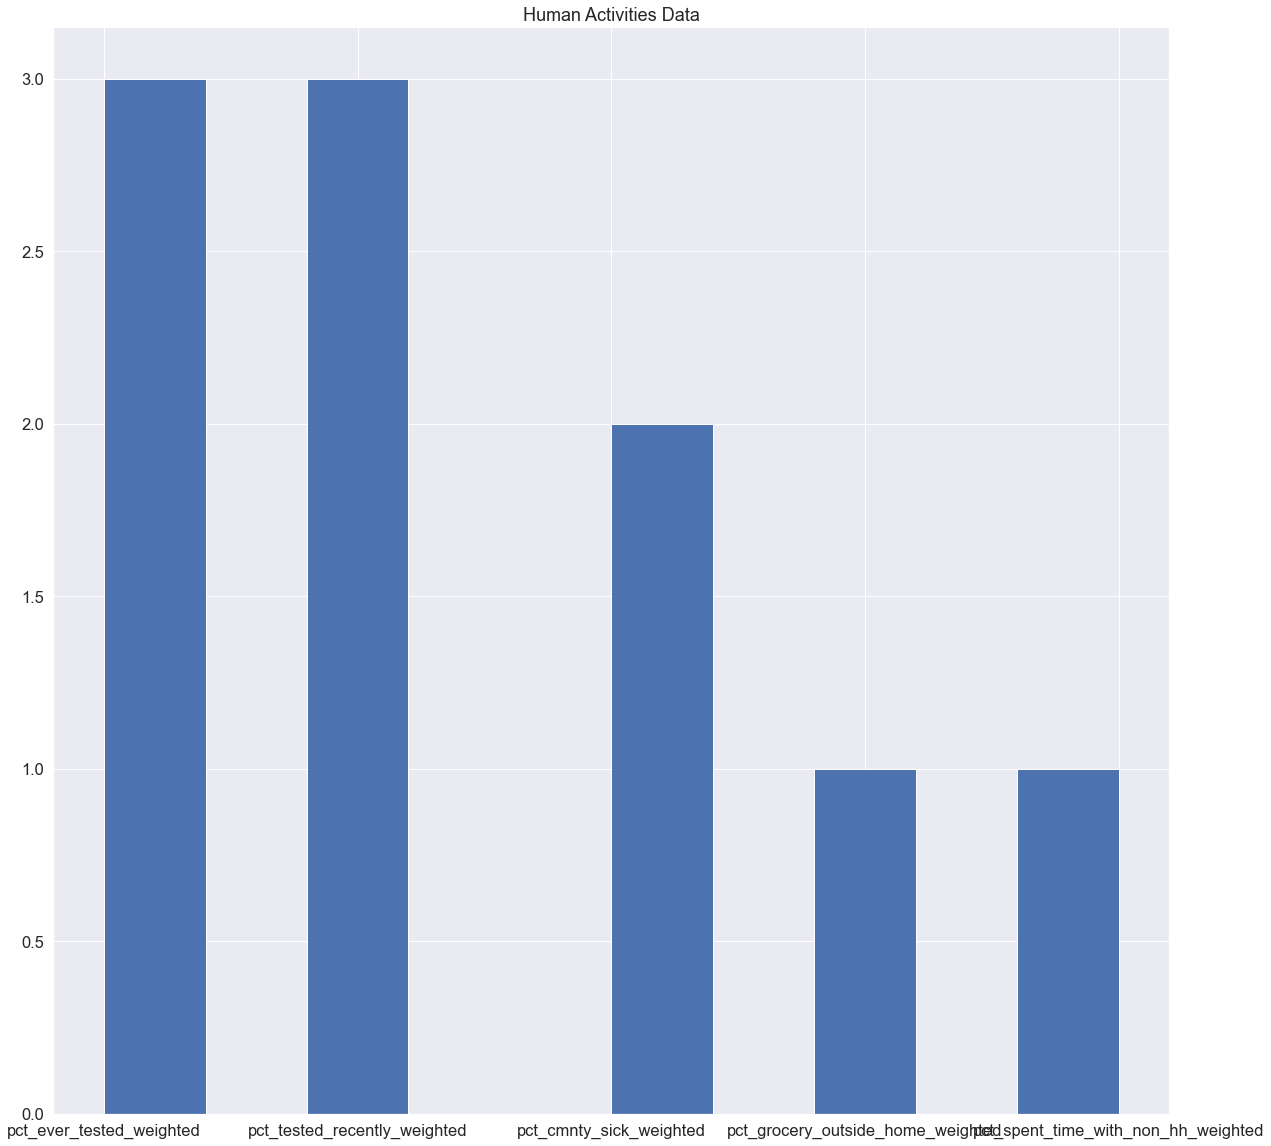

In [95]:
# Plot histogram for Human Activities combinations
plt.figure(figsize=(20,20))
plt.hist(list2)
plt.title("Human Activities Data")
plt.show()

In [96]:
# CLUSTER 0 COUNTRY GROUP related human activities
import numpy as np
covid = pd.read_csv('covid_train.csv')
mu = np.array(cluster_0_data['country_name'].values.tolist())
df = pd.DataFrame()
df = covid.loc[covid['country_name'].isin(mu)]
df = df.drop_duplicates(subset=['country_name'])
df = df.iloc[:,64:80]
df

,pct_cmnty_sick_weighted,pct_ever_tested_weighted,pct_tested_recently_weighted,pct_worked_outside_home_weighted,pct_grocery_outside_home_weighted,pct_ate_outside_home_weighted,pct_spent_time_with_non_hh_weighted,pct_attended_public_event_weighted,pct_used_public_transit_weighted,pct_direct_contact_with_non_hh_weighted,pct__all_time_weighted,pct_wear_mask_most_time_weighted,pct_wear_mask_half_time_weighted,pct_wear_mask_some_time_weighted,pct_wear_mask_none_time_weighted,pct_no_public_weighted
3,33.016667,10.893333,6.556667,31.763333,66.710000,8.400000,29.676667,5.586667,22.000000,34.723333,67.013333,10.026667,2.100000,2.233333,0.726667,12.283333
40,5.363333,2.913333,0.623333,27.226667,60.333333,6.510000,31.203333,5.320000,1.823333,38.466667,74.906667,5.966667,0.630000,0.880000,0.453333,11.496667
48,10.716667,15.196667,8.803333,49.076667,43.983333,34.943333,43.126667,30.053333,15.026667,33.023333,16.416667,23.673333,23.756667,6.003333,9.643333,4.656667
60,28.236667,16.636667,3.620000,25.836667,62.670000,8.330000,28.800000,4.680000,19.826667,37.293333,75.266667,6.090000,0.786667,0.910000,0.320000,10.723333
69,9.950000,5.810000,1.610000,49.500000,48.280000,35.906667,35.653333,13.913333,5.326667,30.840000,48.646667,22.206667,8.753333,2.490000,4.260000,5.266667
75,15.203333,13.333333,7.303333,44.430000,43.473333,31.256667,26.493333,15.360000,15.286667,33.760000,28.473333,25.623333,14.836667,1.633333,3.080000,10.880000
255,34.896667,4.313333,1.413333,40.910000,61.710000,18.496667,43.156667,14.450000,28.313333,49.383333,64.423333,13.073333,2.780000,2.473333,0.746667,8.086667
311,3.893333,2.926667,0.446667,16.623333,38.470000,1.496667,14.213333,4.606667,0.816667,17.303333,41.360000,16.313333,6.526667,1.346667,1.550000,27.540000
683,10.383333,9.720000,3.720000,50.833333,49.033333,18.320000,44.730000,15.350000,38.536667,42.526667,47.936667,23.046667,8.176667,3.016667,0.260000,3.866667
767,9.500000,13.460000,3.340000,48.823333,46.250000,22.726667,48.583333,30.783333,8.936667,44.820000,34.306667,21.640000,11.206667,7.450000,6.570000,6.380000


In [97]:
# Include the 5 human activities extracted in task 5 6th analysis
df = Symptoms.loc[[3,40,48,60,69,75,255,311,683,767]]
list2 = list(dict.fromkeys(list2))
df = df[list2]
df

,pct_ever_tested_weighted,pct_tested_recently_weighted,pct_cmnty_sick_weighted,pct_grocery_outside_home_weighted,pct_spent_time_with_non_hh_weighted
3,1,1,1,1,0
40,0,0,0,0,0
48,1,1,1,0,0
60,1,1,1,1,0
69,0,0,1,0,0
75,1,1,1,0,0
255,0,0,1,1,0
311,0,0,0,0,0
683,0,1,1,0,1
767,1,1,1,0,1


In [98]:
# Frequency for human activities in cluster 0
df = df.apply(pd.value_counts)
df = df.iloc[1]
df

pct_ever_tested_weighted               5
pct_tested_recently_weighted           6
pct_cmnty_sick_weighted                8
pct_grocery_outside_home_weighted      3
pct_spent_time_with_non_hh_weighted    2
Name: 1, dtype: int64

In [99]:
# Average human activities per country in cluster 0
df.sum()/10

2.4

In [100]:
# CLUSTER 1 COUNTRY GROUP related human activities
import numpy as np
covid = pd.read_csv('covid_train.csv')
mu = np.array(cluster_1_data['country_name'].values.tolist())
df1 = pd.DataFrame()
df1 = covid.loc[covid['country_name'].isin(mu)]
df1 = df1.drop_duplicates(subset=['country_name'])
df1 = df1.iloc[:,64:80]
df1

,pct_cmnty_sick_weighted,pct_ever_tested_weighted,pct_tested_recently_weighted,pct_worked_outside_home_weighted,pct_grocery_outside_home_weighted,pct_ate_outside_home_weighted,pct_spent_time_with_non_hh_weighted,pct_attended_public_event_weighted,pct_used_public_transit_weighted,pct_direct_contact_with_non_hh_weighted,pct__all_time_weighted,pct_wear_mask_most_time_weighted,pct_wear_mask_half_time_weighted,pct_wear_mask_some_time_weighted,pct_wear_mask_none_time_weighted,pct_no_public_weighted
0,10.860000,13.476667,2.056667,45.603333,66.836667,28.300000,49.786667,23.816667,30.513333,53.456667,35.346667,24.210000,13.823333,4.906667,7.853333,7.180000
8,3.833333,2.370000,0.360000,32.053333,70.820000,6.943333,43.610000,7.500000,12.113333,50.040000,63.263333,13.343333,6.403333,3.126667,1.266667,8.206667
9,7.836667,7.236667,1.366667,29.260000,59.350000,25.363333,51.673333,23.590000,4.613333,58.783333,8.550000,7.243333,9.903333,7.300000,37.486667,19.536667
10,26.390000,20.313333,6.786667,35.963333,54.266667,21.980000,44.076667,12.033333,19.246667,44.496667,74.363333,6.046667,1.213333,0.483333,0.740000,8.940000
11,27.143333,11.170000,3.353333,34.590000,59.330000,34.126667,48.506667,26.260000,36.106667,59.613333,20.280000,20.563333,14.266667,11.486667,14.480000,10.926667
12,20.616667,9.200000,3.136667,40.183333,56.936667,30.983333,31.190000,1.713333,3.303333,28.383333,65.846667,14.956667,3.276667,1.333333,0.406667,9.043333
13,16.056667,5.796667,2.233333,29.266667,61.233333,22.206667,41.353333,5.606667,25.296667,42.553333,71.310000,8.976667,1.580000,1.376667,0.286667,9.066667
14,4.426667,2.326667,0.266667,26.580000,57.573333,6.400000,32.396667,3.340000,13.316667,37.533333,67.706667,7.280000,1.716667,0.926667,1.586667,16.156667
16,2.056667,4.410000,0.516667,30.033333,67.356667,3.320000,35.636667,5.766667,3.386667,37.650000,72.476667,6.376667,1.223333,0.576667,0.200000,13.840000
17,4.636667,1.433333,0.140000,22.530000,54.250000,4.556667,19.523333,2.463333,4.903333,20.423333,49.973333,10.710000,4.236667,2.490000,1.306667,24.106667


In [101]:
# Include the 5 human activities extracted in task 5 6th analysis
df1 = Symptoms.loc[[0,8,9,10,11,12,13,14,16,17,21,28,30,31,32,41,56,59,62,64,70,72,73,74,79,101,104,105,
                    113,128,147,175,182,223,226,231,247,273,322]]
df1 = df1[list2]
df1

,pct_ever_tested_weighted,pct_tested_recently_weighted,pct_cmnty_sick_weighted,pct_grocery_outside_home_weighted,pct_spent_time_with_non_hh_weighted
0,1,0,1,1,1
8,0,0,0,1,0
9,0,0,0,0,1
10,1,1,1,0,0
11,1,1,1,0,1
12,0,1,1,0,0
13,0,0,1,0,0
14,0,0,0,0,0
16,0,0,0,1,0
17,0,0,0,0,0


In [102]:
# Frequency for human activities for cluster 1
df1 = df1.apply(pd.value_counts)
df1 = df1.iloc[1]
df1

pct_ever_tested_weighted               13
pct_tested_recently_weighted           14
pct_cmnty_sick_weighted                15
pct_grocery_outside_home_weighted      21
pct_spent_time_with_non_hh_weighted    15
Name: 1, dtype: int64

In [103]:
# Average human activities for Cluster 1
df1.sum()/39

2.0

In [104]:
# CLUSTER 2 COUNTRY GROUP related human activities
import numpy as np
covid = pd.read_csv('covid_train.csv')
mu = np.array(cluster_2_data['country_name'].values.tolist())
df2 = pd.DataFrame()
df2 = covid.loc[covid['country_name'].isin(mu)]
df2 = df2.drop_duplicates(subset=['country_name'])
df2 = df2.iloc[:,64:80]
df2

,pct_cmnty_sick_weighted,pct_ever_tested_weighted,pct_tested_recently_weighted,pct_worked_outside_home_weighted,pct_grocery_outside_home_weighted,pct_ate_outside_home_weighted,pct_spent_time_with_non_hh_weighted,pct_attended_public_event_weighted,pct_used_public_transit_weighted,pct_direct_contact_with_non_hh_weighted,pct__all_time_weighted,pct_wear_mask_most_time_weighted,pct_wear_mask_half_time_weighted,pct_wear_mask_some_time_weighted,pct_wear_mask_none_time_weighted,pct_no_public_weighted
1,2.506667,12.940000,0.533333,21.790000,67.546667,47.416667,64.396667,10.273333,8.613333,49.753333,65.700000,21.323333,4.210000,1.383333,0.446667,1.780000
2,4.890000,18.940000,4.036667,31.310000,64.013333,38.610000,53.303333,10.666667,9.143333,45.066667,58.990000,20.450000,5.683333,3.613333,2.733333,2.416667
4,6.263333,18.606667,3.820000,32.436667,66.833333,49.513333,61.060000,13.253333,17.170000,60.396667,24.056667,36.970000,22.986667,6.636667,2.596667,1.396667
5,3.160000,8.506667,1.023333,44.313333,71.303333,37.520000,64.516667,18.113333,25.893333,69.910000,33.600000,33.643333,14.320000,9.200000,3.416667,1.640000
6,5.366667,7.326667,0.873333,33.410000,53.183333,30.373333,24.000000,4.393333,2.690000,20.733333,60.863333,15.756667,4.243333,1.370000,0.796667,10.350000
7,7.913333,16.110000,2.200000,49.530000,70.346667,58.420000,68.180000,34.033333,13.633333,69.770000,1.206667,1.603333,2.170000,1.820000,81.956667,3.050000
22,2.816667,15.136667,3.653333,28.973333,60.820000,29.686667,53.153333,6.306667,10.500000,42.233333,33.763333,24.170000,18.390000,8.726667,4.413333,4.130000
35,1.793333,2.040000,0.170000,21.916667,67.460000,5.956667,50.653333,2.380000,11.180000,44.253333,82.366667,9.153333,0.383333,0.403333,0.000000,4.476667
37,15.336667,13.950000,4.856667,44.576667,46.630000,21.640000,34.760000,4.676667,5.100000,33.296667,57.376667,15.063333,3.660000,2.546667,0.136667,9.413333
39,3.956667,6.713333,2.166667,45.133333,80.060000,34.963333,60.740000,18.593333,22.300000,65.913333,35.253333,24.920000,13.013333,14.880000,3.606667,2.403333


In [105]:
# Include the 5 human activities extracted in task 5 6th analysis
df2 = Symptoms.loc[[1,2,4,5,6,7,22,35,37,39,44,51,53,55,57,63,77,78,80,115,122,123,138,153,194,297]]
df2 = df2[list2]
df2

,pct_ever_tested_weighted,pct_tested_recently_weighted,pct_cmnty_sick_weighted,pct_grocery_outside_home_weighted,pct_spent_time_with_non_hh_weighted
1,1,0,0,1,1
2,1,1,0,1,1
4,1,1,0,1,1
5,0,0,0,1,1
6,0,0,0,0,0
7,1,0,0,1,1
22,1,1,0,0,1
35,0,0,0,1,1
37,1,1,1,0,0
39,0,0,0,1,1


In [106]:
# Frequency of each human activities in Cluster 2
df2 = df2.apply(pd.value_counts)
df2 = df2.iloc[1]
df2

pct_ever_tested_weighted               11
pct_tested_recently_weighted           10
pct_cmnty_sick_weighted                 5
pct_grocery_outside_home_weighted      17
pct_spent_time_with_non_hh_weighted    19
Name: 1, dtype: int64

In [107]:
# average human activities per country in Cluster 2
df2.sum()/26

2.3846153846153846

In [108]:
# Hong Kong related human activities
covid = pd.read_csv('covid_train.csv')
df3 = pd.DataFrame()
df3 = covid.iloc[[29]]
df3.iloc[:,64:80]

,pct_cmnty_sick_weighted,pct_ever_tested_weighted,pct_tested_recently_weighted,pct_worked_outside_home_weighted,pct_grocery_outside_home_weighted,pct_ate_outside_home_weighted,pct_spent_time_with_non_hh_weighted,pct_attended_public_event_weighted,pct_used_public_transit_weighted,pct_direct_contact_with_non_hh_weighted,pct__all_time_weighted,pct_wear_mask_most_time_weighted,pct_wear_mask_half_time_weighted,pct_wear_mask_some_time_weighted,pct_wear_mask_none_time_weighted,pct_no_public_weighted
29,7.293333,3.86,0.17,30.203333,71.116667,70.1,38.97,12.206667,69.24,32.853333,73.676667,15.143333,1.11,0.72,0.783333,1.746667


In [109]:
# Include the 5 human activities extracted in task 5 6th analysis
df3 = Symptoms.loc[[29]]
df3 = df3[list2]
df3

,pct_ever_tested_weighted,pct_tested_recently_weighted,pct_cmnty_sick_weighted,pct_grocery_outside_home_weighted,pct_spent_time_with_non_hh_weighted
29,0,0,0,1,0


In [110]:
# Additional Surprising findings

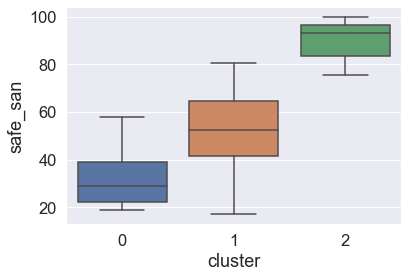

In [111]:
# boxplot for Cluster 0 to 2 for safe_san
sns.boxplot(x='cluster',y='safe_san',data =task_d_data)

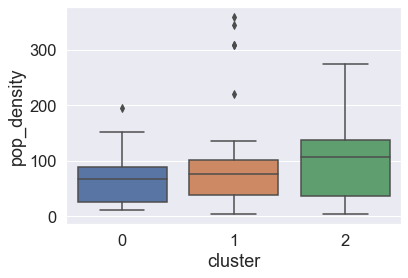

In [112]:
# boxplot for Cluster 0 to 2 for pop_density
sns.boxplot(x='cluster',y='pop_density',data =task_d_data)

## task 6

### part 1

### data preprocessing

In [2]:
data = pd.read_csv('covid_train.csv')
data.drop(['total_cases'], axis=1, inplace = True)
print(data.shape)
data.head()

(3864, 91)


,country_name,country_code,pop_total,pop_density,GDP,basic_water,safe_water,basic_san,safe_san,C1_School closing_1,...,walking,transit,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,prev_cases,new_cases_percentages
0,Kyrgyzstan,KGZ,6456900,32.965589,5470.811536,87.455903,68.223320,96.507067,NaN,0,...,NaN,NaN,-14.000000,-5.000000,11.000000,-13.666667,-10.666667,-2.666667,2789,2
1,Italy,ITA,60297396,205.418372,44196.693100,99.442734,95.039615,98.772433,96.208014,0,...,84.92,59.42,-13.000000,-6.666667,57.000000,-28.666667,-27.666667,4.666667,238833,1
2,Canada,CAN,37589262,4.075188,51341.705170,99.436244,98.860854,99.286013,82.316398,0,...,171.06,60.08,-8.666667,2.333333,169.666667,-31.666667,-18.333333,2.333333,130493,2
3,Bolivia,BOL,11513100,10.480146,9086.060696,92.848735,NaN,60.716938,22.938271,0,...,NaN,NaN,-63.666667,-48.666667,-55.666667,-64.333333,-49.666667,28.333333,42984,3
4,Austria,AUT,8877067,107.127967,59110.562560,100.000000,98.906201,99.972910,96.746738,0,...,146.01,NaN,2.000000,-1.666667,112.333333,-20.666667,-34.666667,3.000000,23373,2


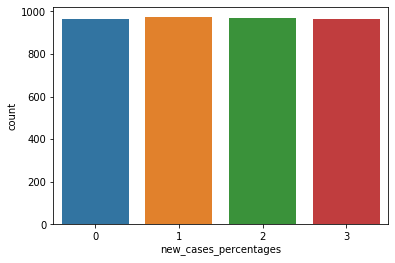

In [3]:
sns.countplot(x ='new_cases_percentages', data = data) 

### Check Duplicated Rows

In [4]:
data[data.duplicated()]

,country_name,country_code,pop_total,pop_density,GDP,basic_water,safe_water,basic_san,safe_san,C1_School closing_1,...,walking,transit,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,prev_cases,new_cases_percentages


### Check and Impute null data by IterativeImputer()

In [5]:
null_df = pd.DataFrame(data.isnull().sum())
null_df[null_df[0] > 0]

,0
pop_density,36
safe_water,1255
safe_san,1357
GovernmentResponseIndex,3
ContainmentHealthIndex,3
EconomicSupportIndex,2
driving,1893
walking,1893
transit,3015
retail_and_recreation_percent_change_from_baseline,317


In [6]:
column_list_data = data[data.iloc[:,2:].columns].values.tolist()
print(len(column_list_data))
imp_mean = IterativeImputer().fit_transform(column_list_data)
print(len(imp_mean))
imp_mean

3864
3864


array([[ 6.45690000e+06,  3.29655892e+01,  5.47081154e+03, ...,
        -2.66666667e+00,  2.78900000e+03,  2.00000000e+00],
       [ 6.02973960e+07,  2.05418372e+02,  4.41966931e+04, ...,
         4.66666667e+00,  2.38833000e+05,  1.00000000e+00],
       [ 3.75892620e+07,  4.07518824e+00,  5.13417052e+04, ...,
         2.33333333e+00,  1.30493000e+05,  2.00000000e+00],
       ...,
       [ 1.26264931e+08,  3.47073458e+02,  4.32357176e+04, ...,
         9.33333333e+00,  2.57360000e+04,  1.00000000e+00],
       [ 5.03394430e+07,  4.47487021e+01,  1.56437314e+04, ...,
         2.33333333e+01,  2.41040000e+04,  2.00000000e+00],
       [ 3.64717690e+07,  8.07285189e+01,  7.82616768e+03, ...,
         9.00000000e+00,  6.25900000e+04,  2.00000000e+00]])

In [7]:
new_df = pd.DataFrame(imp_mean,columns=data.iloc[:,2:].columns)
data2 = data
for col in data.iloc[:,2:].columns:
    data2[col] = new_df[col]
data2.head()

,country_name,country_code,pop_total,pop_density,GDP,basic_water,safe_water,basic_san,safe_san,C1_School closing_1,...,walking,transit,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,prev_cases,new_cases_percentages
0,Kyrgyzstan,KGZ,6456900.0,32.965589,5470.811536,87.455903,68.223320,96.507067,44.193840,0.0,...,88.175249,49.743097,-14.000000,-5.000000,11.000000,-13.666667,-10.666667,-2.666667,2789.0,2.0
1,Italy,ITA,60297396.0,205.418372,44196.693100,99.442734,95.039615,98.772433,96.208014,0.0,...,84.920000,59.420000,-13.000000,-6.666667,57.000000,-28.666667,-27.666667,4.666667,238833.0,1.0
2,Canada,CAN,37589262.0,4.075188,51341.705170,99.436244,98.860854,99.286013,82.316398,0.0,...,171.060000,60.080000,-8.666667,2.333333,169.666667,-31.666667,-18.333333,2.333333,130493.0,2.0
3,Bolivia,BOL,11513100.0,10.480146,9086.060696,92.848735,40.691922,60.716938,22.938271,0.0,...,108.462988,23.039016,-63.666667,-48.666667,-55.666667,-64.333333,-49.666667,28.333333,42984.0,3.0
4,Austria,AUT,8877067.0,107.127967,59110.562560,100.000000,98.906201,99.972910,96.746738,0.0,...,146.010000,106.809803,2.000000,-1.666667,112.333333,-20.666667,-34.666667,3.000000,23373.0,2.0


In [8]:
null_df = pd.DataFrame(data2.isnull().sum()) #confirming no missing value
null_df[null_df[0] > 0]

,0


### filter ordinary data and label column

In [9]:
data_num = data2.drop(data.columns[list(range(9,47))], axis = 1) 
data_num = data_num.drop(data_num.columns[[0,1,-1]], axis = 1) 

print(data_num.shape)
data_num.head()

(3864, 50)


,pop_total,pop_density,GDP,basic_water,safe_water,basic_san,safe_san,StringencyIndex,GovernmentResponseIndex,ContainmentHealthIndex,...,driving,walking,transit,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,prev_cases
0,6456900.0,32.965589,5470.811536,87.455903,68.223320,96.507067,44.193840,74.536667,66.366667,69.096667,...,128.450737,88.175249,49.743097,-14.000000,-5.000000,11.000000,-13.666667,-10.666667,-2.666667,2789.0
1,60297396.0,205.418372,44196.693100,99.442734,95.039615,98.772433,96.208014,55.560000,64.580000,62.850000,...,130.283333,84.920000,59.420000,-13.000000,-6.666667,57.000000,-28.666667,-27.666667,4.666667,238833.0
2,37589262.0,4.075188,51341.705170,99.436244,98.860854,99.286013,82.316398,64.350000,70.830000,70.140000,...,164.786667,171.060000,60.080000,-8.666667,2.333333,169.666667,-31.666667,-18.333333,2.333333,130493.0
3,11513100.0,10.480146,9086.060696,92.848735,40.691922,60.716938,22.938271,89.810000,72.620000,80.560000,...,49.195880,108.462988,23.039016,-63.666667,-48.666667,-55.666667,-64.333333,-49.666667,28.333333,42984.0
4,8877067.0,107.127967,59110.562560,100.000000,98.906201,99.972910,96.746738,31.480000,50.600000,44.440000,...,168.476667,146.010000,106.809803,2.000000,-1.666667,112.333333,-20.666667,-34.666667,3.000000,23373.0


In [10]:
data_num[data_num.duplicated()] #check duplicated rows again

,pop_total,pop_density,GDP,basic_water,safe_water,basic_san,safe_san,StringencyIndex,GovernmentResponseIndex,ContainmentHealthIndex,...,driving,walking,transit,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,prev_cases


### standardize and delete outlier in numeric data

In [11]:
scaled_data = StandardScaler().fit_transform(data_num)  #standardize
scaled_data = pd.DataFrame(scaled_data, columns=data_num.columns)
scaled_data.describe()[1:3]

,pop_total,pop_density,GDP,basic_water,safe_water,basic_san,safe_san,StringencyIndex,GovernmentResponseIndex,ContainmentHealthIndex,...,driving,walking,transit,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,prev_cases
mean,7.629551e-17,4.661845e-17,3.807054e-17,5.500259e-16,-3.737557e-16,1.914301e-17,1.996045e-16,5.216813e-16,-2.419275e-16,-1.752681e-18,...,-3.212722e-16,-3.763955e-17,2.912037e-17,2.682177e-17,5.689031e-18,-5.444805e-18,1.950504e-16,-2.700135e-17,-5.245114e-17,3.066115e-17
std,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,...,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00


In [12]:
for col in scaled_data.columns:
    data_num[col] = scaled_data[col]
data_num.head()

,pop_total,pop_density,GDP,basic_water,safe_water,basic_san,safe_san,StringencyIndex,GovernmentResponseIndex,ContainmentHealthIndex,...,driving,walking,transit,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,prev_cases
0,-0.321534,-0.243881,-0.931539,-0.380915,-0.133931,0.562727,-0.494859,0.464881,0.193299,0.259863,...,0.599726,-0.062564,-0.248098,0.553057,0.271943,0.013381,0.963998,0.990275,-1.591260,-0.287264
1,0.061303,-0.072700,0.815299,0.593151,0.826126,0.664564,1.217384,-0.473848,0.070585,-0.127633,...,0.638383,-0.130112,-0.045145,0.599567,0.171879,0.704050,0.212629,-0.157192,-0.697558,0.490255
2,-0.100165,-0.272559,1.137595,0.592624,0.962932,0.687651,0.760089,-0.039028,0.499854,0.324583,...,1.366204,1.657316,-0.031303,0.801110,0.712224,2.395688,0.062356,0.472790,-0.981918,0.133388
3,-0.285582,-0.266201,-0.768463,0.057314,-1.119590,-1.046179,-1.194567,1.220415,0.622797,0.970962,...,-1.072094,0.358411,-0.808162,-1.756936,-2.349731,-0.987589,-1.573959,-1.642151,2.186662,-0.154863
4,-0.304326,-0.170266,1.488031,0.638436,0.964555,0.718530,1.235118,-1.665026,-0.889605,-1.269651,...,1.444042,1.137522,0.948760,1.297216,0.472070,1.534854,0.613359,-0.629679,-0.900672,-0.219461


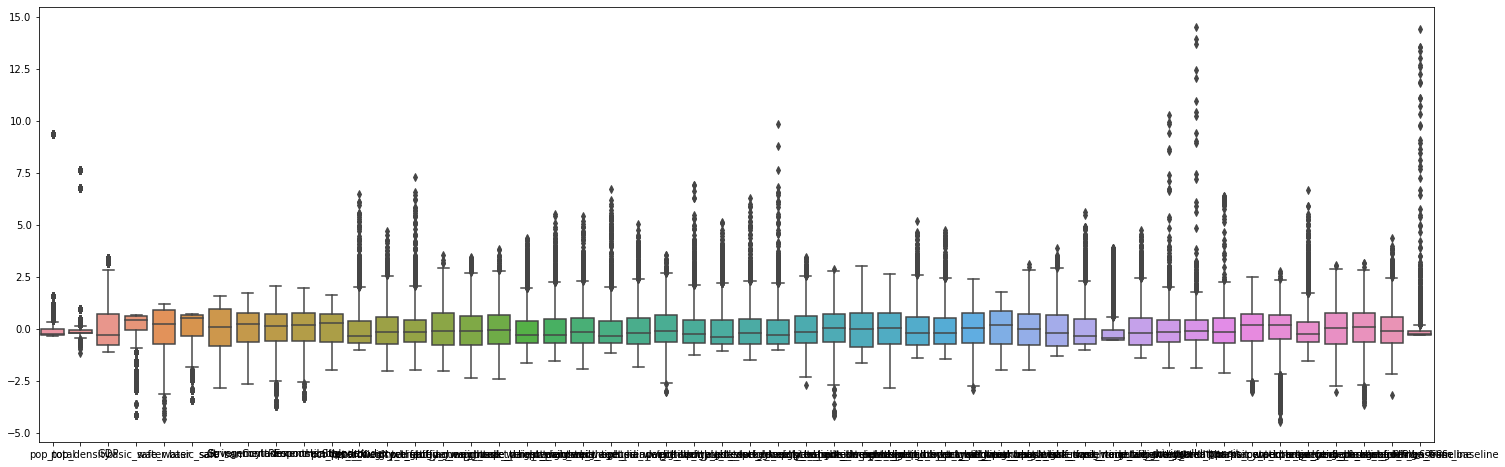

In [13]:
plt.figure(figsize=(25,8))
sns.boxplot(data=data_num)

In [14]:
data_num.head()

,pop_total,pop_density,GDP,basic_water,safe_water,basic_san,safe_san,StringencyIndex,GovernmentResponseIndex,ContainmentHealthIndex,...,driving,walking,transit,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,prev_cases
0,-0.321534,-0.243881,-0.931539,-0.380915,-0.133931,0.562727,-0.494859,0.464881,0.193299,0.259863,...,0.599726,-0.062564,-0.248098,0.553057,0.271943,0.013381,0.963998,0.990275,-1.591260,-0.287264
1,0.061303,-0.072700,0.815299,0.593151,0.826126,0.664564,1.217384,-0.473848,0.070585,-0.127633,...,0.638383,-0.130112,-0.045145,0.599567,0.171879,0.704050,0.212629,-0.157192,-0.697558,0.490255
2,-0.100165,-0.272559,1.137595,0.592624,0.962932,0.687651,0.760089,-0.039028,0.499854,0.324583,...,1.366204,1.657316,-0.031303,0.801110,0.712224,2.395688,0.062356,0.472790,-0.981918,0.133388
3,-0.285582,-0.266201,-0.768463,0.057314,-1.119590,-1.046179,-1.194567,1.220415,0.622797,0.970962,...,-1.072094,0.358411,-0.808162,-1.756936,-2.349731,-0.987589,-1.573959,-1.642151,2.186662,-0.154863
4,-0.304326,-0.170266,1.488031,0.638436,0.964555,0.718530,1.235118,-1.665026,-0.889605,-1.269651,...,1.444042,1.137522,0.948760,1.297216,0.472070,1.534854,0.613359,-0.629679,-0.900672,-0.219461


In [15]:
num_record = data_num.shape[0]

Q1 = data_num.quantile(0.25)
Q3 = data_num.quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

data_num2 = data_num[~( (data_num < LB) | (data_num > UB) ).any(axis=1) ]
new_num_record = data_num2.shape[0]
print("Number of deleted data:  ", num_record - new_num_record)
print("data remained: ", new_num_record)

Number of deleted data:   2601
data remained:  1263


### Detecting Multicollinearity by PCA on numeric data (before deleting outlier)

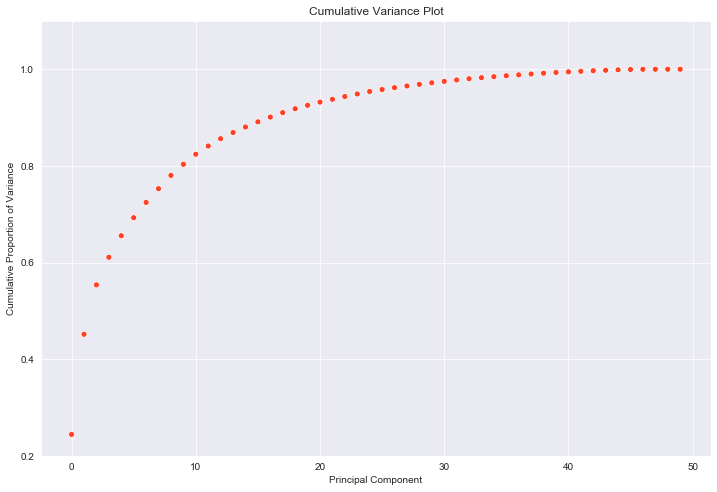

In [18]:
pca = PCA(n_components=data_num.shape[1])
pca.fit_transform(data_num)
cum_var = pd.DataFrame(pca.explained_variance_ratio_.cumsum(), columns = ['cum_var'])

plt.figure(figsize=(12,8))
sns.set_style(style="darkgrid")
ax = sns.scatterplot(data=cum_var, legend=False, palette='CMRmap')
ax.set_title('Cumulative Variance Plot')
ax.set_ylabel('Cumulative Proportion of Variance')
ax.set_xlabel('Principal Component')
ax.set_ylim(0.2, 1.1)
plt.show()

no. of components maintaining 85% variance=  13
no. of components maintaining 97.5% variance=  32


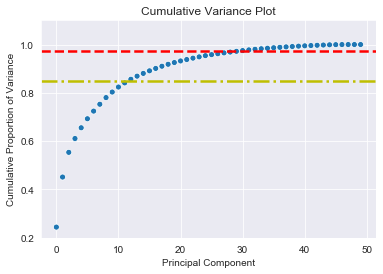

In [19]:
threshold_1 = cum_var[cum_var['cum_var'] <= 0.85].shape[0] + 1
threshold_2 = cum_var[cum_var['cum_var'] <= 0.975].shape[0] + 1
print("no. of components maintaining 85% variance= ", threshold_1)
print("no. of components maintaining 97.5% variance= ", threshold_2)

sns.set_style(style="darkgrid")
ax = sns.scatterplot(data=cum_var, legend=False)
ax.set_title('Cumulative Variance Plot')
ax.set_ylabel('Cumulative Proportion of Variance')
ax.set_xlabel('Principal Component')
ax.set_ylim(0.2, 1.1)
plt.axhline(0.975, ls='--', lw=2.5, color='r')
plt.axhline(0.85, ls='-.', lw=2.5, color='y')
plt.show()

### setting up 2 dataframes for model creation

In [20]:
df = data2.iloc[:,2:] # filling missing value
print(df.shape)
df.head()

(3864, 89)


,pop_total,pop_density,GDP,basic_water,safe_water,basic_san,safe_san,C1_School closing_1,C1_School closing_2,C1_School closing_3,...,walking,transit,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,prev_cases,new_cases_percentages
0,6456900.0,32.965589,5470.811536,87.455903,68.223320,96.507067,44.193840,0.0,0.0,1.0,...,88.175249,49.743097,-14.000000,-5.000000,11.000000,-13.666667,-10.666667,-2.666667,2789.0,2.0
1,60297396.0,205.418372,44196.693100,99.442734,95.039615,98.772433,96.208014,0.0,0.0,1.0,...,84.920000,59.420000,-13.000000,-6.666667,57.000000,-28.666667,-27.666667,4.666667,238833.0,1.0
2,37589262.0,4.075188,51341.705170,99.436244,98.860854,99.286013,82.316398,0.0,0.0,1.0,...,171.060000,60.080000,-8.666667,2.333333,169.666667,-31.666667,-18.333333,2.333333,130493.0,2.0
3,11513100.0,10.480146,9086.060696,92.848735,40.691922,60.716938,22.938271,0.0,0.0,1.0,...,108.462988,23.039016,-63.666667,-48.666667,-55.666667,-64.333333,-49.666667,28.333333,42984.0,3.0
4,8877067.0,107.127967,59110.562560,100.000000,98.906201,99.972910,96.746738,0.0,0.0,0.0,...,146.010000,106.809803,2.000000,-1.666667,112.333333,-20.666667,-34.666667,3.000000,23373.0,2.0


In [21]:
df2 = data2.iloc[:,2:] # filling missing value + standardize
for col in data_num.columns:
    df2[col] = data_num[col]
print(df2.shape)
df2.head()

(3864, 89)


,pop_total,pop_density,GDP,basic_water,safe_water,basic_san,safe_san,C1_School closing_1,C1_School closing_2,C1_School closing_3,...,walking,transit,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,prev_cases,new_cases_percentages
0,-0.321534,-0.243881,-0.931539,-0.380915,-0.133931,0.562727,-0.494859,0.0,0.0,1.0,...,-0.062564,-0.248098,0.553057,0.271943,0.013381,0.963998,0.990275,-1.591260,-0.287264,2.0
1,0.061303,-0.072700,0.815299,0.593151,0.826126,0.664564,1.217384,0.0,0.0,1.0,...,-0.130112,-0.045145,0.599567,0.171879,0.704050,0.212629,-0.157192,-0.697558,0.490255,1.0
2,-0.100165,-0.272559,1.137595,0.592624,0.962932,0.687651,0.760089,0.0,0.0,1.0,...,1.657316,-0.031303,0.801110,0.712224,2.395688,0.062356,0.472790,-0.981918,0.133388,2.0
3,-0.285582,-0.266201,-0.768463,0.057314,-1.119590,-1.046179,-1.194567,0.0,0.0,1.0,...,0.358411,-0.808162,-1.756936,-2.349731,-0.987589,-1.573959,-1.642151,2.186662,-0.154863,3.0
4,-0.304326,-0.170266,1.488031,0.638436,0.964555,0.718530,1.235118,0.0,0.0,0.0,...,1.137522,0.948760,1.297216,0.472070,1.534854,0.613359,-0.629679,-0.900672,-0.219461,2.0


### Grid Search CV to find out the best decision tree model

#### df (filling missing value)

In [22]:
X_data=df.iloc[:,:-1]
Y_data=df.iloc[:,-1]
cls = tree.DecisionTreeClassifier(random_state=0)
pipe = Pipeline(steps = [('model', cls)] )

In [150]:
parameters = {'model__criterion': ['gini', 'entropy'],
              'model__max_depth': list(range(3,11)), 
              'model__min_samples_split': list(range(2,15,2)),
              'model__ccp_alpha': [0,0.005,0.01,0.015,0.02]}

clf_GS = GridSearchCV(estimator=pipe, param_grid=parameters, scoring='f1_weighted',
                      cv=StratifiedKFold(n_splits=5), verbose=5, n_jobs=-1)
clf_GS.fit(X_data, Y_data)
print(clf_GS.best_estimator_.get_params()['model']);print()
print(clf_GS.best_params_)
print(clf_GS.best_score_)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 845 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 1241 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1709 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2247 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2553 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2800 out of 2800 | elapsed:  3.1min finished


DecisionTreeClassifier(ccp_alpha=0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

{'model__ccp_alpha': 0, 'model__criterion': 'entropy', 'model__max_depth': 10, 'model__min_samples_split': 2}
0.7220664269786471


In [151]:
parameters = {'model__criterion': ['gini', 'entropy'],
              'model__max_depth': list(range(10,16)), 
              'model__min_samples_split': list(range(2,15,2))}

clf_GS = GridSearchCV(estimator=pipe, param_grid=parameters, scoring='f1_weighted',
                      cv=StratifiedKFold(n_splits=5), n_jobs=-1, verbose = 5)
clf_GS.fit(X_data, Y_data)
print(clf_GS.best_estimator_.get_params()['model']);print()
print(clf_GS.best_params_)
print(clf_GS.best_score_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   36.2s finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=14, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

{'model__criterion': 'entropy', 'model__max_depth': 14, 'model__min_samples_split': 2}
0.7338977713356467


#### df2 (filling missing value + standardize)

In [23]:
X_data2=df2.iloc[:,:-1]
Y_data2=df2.iloc[:,-1]
cls = tree.DecisionTreeClassifier(random_state=0)
pipe = Pipeline(steps = [('model', cls)] )

In [154]:
parameters = {'model__criterion': ['gini', 'entropy'],
              'model__max_depth': list(range(3,11)), 
              'model__min_samples_split': list(range(2,15,2)),
              'model__ccp_alpha': [0,0.005,0.01,0.015,0.02]}

clf_GS = GridSearchCV(estimator=pipe, param_grid=parameters, scoring='f1_weighted',
                      cv=StratifiedKFold(n_splits=5), verbose=5, n_jobs=-1)
clf_GS.fit(X_data2, Y_data2)
print(clf_GS.best_estimator_.get_params()['model']);print()
print(clf_GS.best_params_)
print(clf_GS.best_score_)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 687 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 1155 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1695 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2307 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2793 out of 2800 | elapsed:  2.9min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 2800 out of 2800 | elapsed:  3.0min finished


DecisionTreeClassifier(ccp_alpha=0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

{'model__ccp_alpha': 0, 'model__criterion': 'entropy', 'model__max_depth': 10, 'model__min_samples_split': 8}
0.7216090965002551


In [157]:
parameters = {'model__criterion': ['gini', 'entropy'],
              'model__max_depth': list(range(11,16)), 
              'model__min_samples_split': list(range(2,15,2))}

clf_GS = GridSearchCV(estimator=pipe, param_grid=parameters, scoring='f1_weighted',
                      cv=StratifiedKFold(n_splits=5), n_jobs=-1, verbose = 5)
clf_GS.fit(X_data2, Y_data2)
print(clf_GS.best_estimator_.get_params()['model']);print()
print(clf_GS.best_params_)
print(clf_GS.best_score_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:   32.6s finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

{'model__criterion': 'gini', 'model__max_depth': 14, 'model__min_samples_split': 2}
0.7308280166326323


### Grid Search CV for finding the best random forest classifier model

In [29]:
model = RandomForestClassifier(random_state=0)
pipe = Pipeline(steps = [('model', model)] )

#### df1

In [30]:
parameters = {'model__criterion': ['gini', 'entropy'],
              'model__max_depth': list(range(5,10)),
              'model__n_estimators': [100, 500, 1000],
              'model__min_samples_split': list(range(2,15,2)),
              'model__ccp_alpha': [0,0.005,0.01]}

clf_GS = GridSearchCV(estimator=pipe, param_grid=parameters, scoring='f1_weighted',
                     cv=StratifiedKFold(n_splits=5), n_jobs=-1, verbose=5)
clf_GS.fit(X_data, Y_data)
print(clf_GS.best_estimator_.get_params()['model']);print()
print(clf_GS.best_params_)
print(clf_GS.best_score_)

Fitting 5 folds for each of 630 candidates, totalling 3150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 43.5min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 51.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 65.0min
[Parallel(n_jobs=-1)]: Done 2170 tasks      | elapsed: 84.8min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 96.0min
[Parallel(n_jobs=-1)]: Done 3034 tasks      | elapsed: 117.7min
[Parallel(n_jobs=-1)]: Done 3150 out of 3150 | elapsed: 125.3min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

{'model__ccp_alpha': 0, 'model__criterion': 'entropy', 'model__max_depth': 9, 'model__min_samples_split': 2, 'model__n_estimators': 1000}
0.7965180486525892


In [31]:
parameters = {'model__criterion': ['gini', 'entropy'],
              'model__max_depth': list(range(10,21,2)),
              'model__n_estimators': [500, 1000, 1500], 
              'model__min_samples_split': list(range(2,10,3))}

clf_GS = GridSearchCV(estimator=pipe, param_grid=parameters, scoring='f1_weighted',
                     cv=StratifiedKFold(n_splits=5), n_jobs=-1, verbose=5)
clf_GS.fit(X_data, Y_data)
print(clf_GS.best_estimator_.get_params()['model']);print()
print(clf_GS.best_params_)
print(clf_GS.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 56.8min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=16, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

{'model__criterion': 'entropy', 'model__max_depth': 16, 'model__min_samples_split': 5, 'model__n_estimators': 500}
0.817034452047599


#### df2

In [32]:
parameters = {'model__criterion': ['gini', 'entropy'],
              'model__max_depth': list(range(5,10)),
              'model__n_estimators': [100, 500, 1000],
              'model__min_samples_split': list(range(2,15,2)),
              'model__ccp_alpha': [0,0.005,0.01]}

clf_GS = GridSearchCV(estimator=pipe, param_grid=parameters, scoring='f1_weighted',
                     cv=StratifiedKFold(n_splits=5), n_jobs=-1, verbose=5)
clf_GS.fit(X_data2, Y_data2)
print(clf_GS.best_estimator_.get_params()['model']);print()
print(clf_GS.best_params_)
print(clf_GS.best_score_)

Fitting 5 folds for each of 630 candidates, totalling 3150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 51.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 64.7min
[Parallel(n_jobs=-1)]: Done 2170 tasks      | elapsed: 84.4min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 95.6min
[Parallel(n_jobs=-1)]: Done 3034 tasks      | elapsed: 117.2min
[Parallel(n_jobs=-1)]: Done 3150 out of 3150 | elapsed: 124.9min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

{'model__ccp_alpha': 0, 'model__criterion': 'entropy', 'model__max_depth': 9, 'model__min_samples_split': 2, 'model__n_estimators': 1000}
0.7962061718928611


In [33]:
parameters = {'model__criterion': ['gini', 'entropy'],
              'model__max_depth': list(range(10,21,2)),
              'model__n_estimators': [500, 1000, 1500], 
              'model__min_samples_split': list(range(2,10,3))}

clf_GS = GridSearchCV(estimator=pipe, param_grid=parameters, scoring='f1_weighted',
                     cv=StratifiedKFold(n_splits=5), n_jobs=-1, verbose=5)
clf_GS.fit(X_data2, Y_data2)
print(clf_GS.best_estimator_.get_params()['model']);print()
print(clf_GS.best_params_)
print(clf_GS.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 57.1min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=16, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

{'model__criterion': 'entropy', 'model__max_depth': 16, 'model__min_samples_split': 5, 'model__n_estimators': 1000}
0.8165598576195718


### Grid Search CV for finding the best Support Vectors Mechines model (for df2 only)

In [36]:
methods = ['Polynomial', 'RBF', 'Sigmoid','Linear']
def classifier(ktype):
    if ktype == 0:
        return SVC(kernel='poly', degree=8, gamma="auto", random_state=0)
    elif ktype == 1:
        return SVC(kernel='rbf', gamma="auto", random_state=0)
    elif ktype == 2:
        return SVC(kernel='sigmoid', gamma="auto", random_state=0)
    elif ktype == 3:
        return SVC(kernel='linear', gamma="auto", random_state=0)
    
for num in range(4):
    X_train, X_test, y_train, y_test = train_test_split(X_data2, Y_data2, test_size = 0.2)
    svc = classifier(num) 
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    print("Method:", methods[num], "kernel")
    print(classification_report(y_test,y_pred))

Method: Polynomial kernel
              precision    recall  f1-score   support

         0.0       0.76      0.15      0.25       208
         1.0       0.28      0.93      0.42       188
         2.0       0.76      0.16      0.26       198
         3.0       0.89      0.27      0.42       179

    accuracy                           0.37       773
   macro avg       0.67      0.38      0.34       773
weighted avg       0.67      0.37      0.33       773

Method: RBF kernel
              precision    recall  f1-score   support

         0.0       0.85      0.76      0.80       196
         1.0       0.58      0.73      0.64       176
         2.0       0.68      0.62      0.65       186
         3.0       0.86      0.83      0.85       215

    accuracy                           0.74       773
   macro avg       0.74      0.73      0.73       773
weighted avg       0.75      0.74      0.74       773

Method: Sigmoid kernel
              precision    recall  f1-score   support

       

In [27]:
svc = SVC(random_state=0, kernel='rbf')
pipe = Pipeline(steps = [('svc', svc)] )
parameters = {'svc__C': [0.1,1, 10, 100],
              'svc__gamma': [1,0.1,0.01,0.001, 'auto'],
              'svc__decision_function_shape': ['ovo', 'ovr']}
clf_GS = GridSearchCV(estimator=pipe, param_grid=parameters, scoring='f1_weighted',
                     cv=StratifiedKFold(n_splits=5), n_jobs=-1, verbose=5)
clf_GS.fit(X_data2, Y_data2)
print(clf_GS.best_estimator_.get_params()['svc']);print()
print(clf_GS.best_params_)
print(clf_GS.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.3min finished


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

{'svc__C': 1, 'svc__decision_function_shape': 'ovo', 'svc__gamma': 0.1}
0.807445031605574


In [34]:
svc = SVC(random_state=0, kernel='rbf')
pipe = Pipeline(steps = [('svc', svc)] )
parameters = {'svc__C': [0.5, 1, 1.5],
              'svc__gamma': [0.05, 0.1, 0.15,0.2],
              'svc__decision_function_shape': ['ovo', 'ovr']}
clf_GS = GridSearchCV(estimator=pipe, param_grid=parameters, scoring='f1_weighted',
                     cv=StratifiedKFold(n_splits=5), n_jobs=-1, verbose=5)
clf_GS.fit(X_data2, Y_data2)
print(clf_GS.best_estimator_.get_params()['svc']);print()
print(clf_GS.best_params_)
print(clf_GS.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.9min finished


SVC(C=1.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

{'svc__C': 1.5, 'svc__decision_function_shape': 'ovo', 'svc__gamma': 0.1}
0.8097429899405804


## part 2
## Neural Network

## Data Preprocessing

In [1]:
!pip install optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import os
import warnings as wn
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
from torch.utils.data import DataLoader,Dataset
import optuna
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import random
np.random.seed(333)
def preprocess(name): #preprocess data and return preprocessed data
    data = pd.read_csv(name)
    list_of_na_attr = data.isnull().sum()[data.isnull().sum()!=0].index.tolist()
    list_of_policies_attr = ['C1_School closing_1','C1_School closing_2','C1_School closing_3','C2_Workplace closing_1','C2_Workplace closing_2','C2_Workplace closing_3','C3_Cancel public events_1','C3_Cancel public events_2','C4_Restrictions on gatherings_1','C4_Restrictions on gatherings_2','C4_Restrictions on gatherings_3','C4_Restrictions on gatherings_4','C5_Close public transport_1','C5_Close public transport_2','C6_Stay at home requirements_1','C6_Stay at home requirements_2','C6_Stay at home requirements_3','C7_Restrictions on internal movement_1','C7_Restrictions on internal movement_2','C8_International travel controls_1','C8_International travel controls_2','C8_International travel controls_3','C8_International travel controls_4','E1_Income support_1','E1_Income support_2','E2_Debt/contract relief_1','E2_Debt/contract relief_2','H1_Public information campaigns_1','H1_Public information campaigns_2','H2_Testing policy_1','H2_Testing policy_2','H2_Testing policy_3','H3_Contact tracing_1','H3_Contact tracing_2','H6_Facial Coverings_1','H6_Facial Coverings_2','H6_Facial Coverings_3','H6_Facial Coverings_4','new_cases_percentages']
    temp = data[list_of_na_attr].values.tolist()
    imp_mean = IterativeImputer().fit_transform(temp) 
    temp = pd.DataFrame(imp_mean,columns=list_of_na_attr)
    temp.index = data.index
    for col in list_of_na_attr:
        data[col] = temp[col]
    data = data.drop(['country_name','country_code'],axis=1)
    if 'total_cases' in data.columns:
        data= data.drop(['total_cases'],axis=1)
    scaled_data = StandardScaler().fit_transform(data)  #standardize
    scaled_data = pd.DataFrame(scaled_data, columns = data.columns)
    scaled_data.index = data.index
    scaled_data = scaled_data.drop(list_of_policies_attr,axis=1)
    for i in scaled_data.columns:
        data[i] = scaled_data[i]
    return data

## Global Variable declaration

In [2]:
covid_data = preprocess('covid_train.csv')
X_TR, X_TE, Y_TR, Y_TE = train_test_split(covid_data.drop(['new_cases_percentages'],axis=1), covid_data['new_cases_percentages'], test_size=0.1)
num_train = len(Y_TR)
num_test = len(Y_TE)
display(X_TR, X_TE, Y_TR, Y_TE) # data for hyperparameter tuning
DEVICE = torch.device("cpu")
CLASSES = 4
DIR = os.getcwd()
EPOCHS = 20
LOG_INTERVAL = 10
N_TRAIN_EXAMPLES = num_train
N_VALID_EXAMPLES = num_test

C:\Users\Kenredd\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


,pop_total,pop_density,GDP,basic_water,safe_water,basic_san,safe_san,C1_School closing_1,C1_School closing_2,C1_School closing_3,...,driving,walking,transit,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,prev_cases
1099,-0.352600,-0.177876,0.655612,0.600651,0.978835,0.679719,0.806193,0,0,0,...,2.416984,1.920688,2.361289,1.021464,-1.093791,1.792198,1.777027,0.743468,-1.642279,-0.290139
564,0.318455,0.026084,-0.800563,0.209278,-1.190217,-0.021315,-0.781813,0,0,0,...,0.263262,0.579579,0.986480,0.851708,1.117941,-0.312803,1.609687,1.954959,-0.833964,-0.295232
2619,-0.184587,-0.201865,-0.932236,-1.566271,-1.660799,-2.331053,-1.354430,0,1,0,...,0.798314,1.219196,1.275768,1.191219,0.898760,-0.114218,1.710091,1.292068,-0.429807,-0.252302
2638,-0.343975,-0.215697,-0.465988,0.324958,0.583513,0.511172,-1.479238,0,0,1,...,0.376210,0.434309,-0.309275,-0.876710,-0.097515,0.213447,0.019955,-0.376590,-0.348975,-0.289909
1150,0.006385,-0.190466,-0.974910,-2.700080,-0.891507,-2.469681,-0.806863,0,0,1,...,0.222950,0.640249,0.530907,0.296145,-0.236994,-0.377343,0.706050,0.377735,0.499755,-0.276061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,-0.337532,-0.049424,1.163320,0.638436,1.062398,0.719748,1.436543,0,0,1,...,-0.753707,-0.970046,-0.541291,-0.814980,-1.193418,-0.774513,-0.733076,-0.696607,1.025160,-0.138805
1971,-0.291579,-0.143385,0.742176,0.628705,0.971468,0.680822,1.230590,1,0,0,...,1.196184,0.173346,0.797757,1.376407,1.177717,0.506360,1.576219,0.537743,-1.076458,-0.261370
1443,-0.328194,-0.262195,1.136789,0.638436,1.046653,0.694926,1.407021,1,0,0,...,0.744694,0.687706,0.395547,0.543062,0.998388,1.648224,0.254231,-0.033715,-0.914795,-0.273966
973,-0.187092,-0.277008,1.226844,0.635993,0.704955,0.719350,0.531083,0,0,1,...,-0.508332,-0.654279,-0.783577,0.110958,0.061889,-0.486565,-0.749810,0.377735,-0.066065,-0.229675


,pop_total,pop_density,GDP,basic_water,safe_water,basic_san,safe_san,C1_School closing_1,C1_School closing_2,C1_School closing_3,...,driving,walking,transit,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,prev_cases
1625,-0.108111,-0.199981,-0.825294,-0.435961,-0.213712,0.202942,-0.840097,0,0,1,...,-0.147476,-0.777563,-0.556785,0.465901,0.181442,0.019827,0.086891,-0.673748,-0.025649,-0.206799
3698,-0.100165,-0.276186,1.137595,0.592624,1.013508,0.687651,0.779248,0,0,1,...,0.851977,1.026369,-0.229333,0.743682,0.599878,1.747516,-0.063715,0.537743,-0.833964,0.123061
728,-0.128669,-0.203220,-0.849535,0.462379,-0.701376,0.719748,-0.796292,0,0,1,...,-0.360168,-0.055466,-0.499954,-0.491815,-0.382692,-0.508073,-0.244249,-0.135070,0.524465,-0.289711
1830,-0.297977,-0.172888,0.354400,0.638435,0.614880,0.629430,1.275923,0,1,0,...,-0.287924,-0.869252,-0.274403,0.280713,-0.037739,0.069473,-0.197587,-0.513740,0.176430,-0.284078
137,-0.348549,-0.186769,-0.566020,-0.250917,-0.101632,-0.345291,-0.384583,0,0,1,...,0.676118,0.458225,0.798299,1.114057,0.500250,0.277987,0.906858,-0.193724,-0.874380,-0.220577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,-0.047906,-0.264074,-0.143221,0.563543,0.206493,0.461645,0.119016,0,0,1,...,-1.121686,-1.202660,-1.586151,-1.710054,-0.535876,-1.370268,-1.218362,0.217726,0.944329,-0.066111
3167,-0.250218,-0.188720,-0.972141,-1.107818,-2.120176,-1.113159,-1.728646,0,0,1,...,-0.862272,-0.267111,-0.306135,0.558495,-0.057664,-0.407131,-0.498800,0.400593,-0.308559,-0.295680
241,1.061522,-0.066431,-0.937063,-1.687539,-2.365367,-2.014719,-1.289685,0,0,1,...,-0.049313,0.583699,0.737239,0.373307,0.041963,-0.491530,1.090932,1.543509,0.055182,-0.179666
127,-0.063019,-0.051309,-0.992357,-2.590316,-0.163378,-2.131452,-0.191044,0,0,1,...,-0.094603,-0.025939,-0.128428,-0.121530,-0.084374,-0.141459,-0.060392,-0.029919,0.132965,-0.263234


1099    1
564     0
2619    1
2638    2
1150    1
       ..
3438    3
1971    1
1443    1
973     2
1804    0
Name: new_cases_percentages, Length: 3477, dtype: int64

1625    2
3698    1
728     0
1830    0
137     3
       ..
2935    2
3167    0
241     1
127     0
3320    0
Name: new_cases_percentages, Length: 387, dtype: int64

## Define hyperparameter tuning functions

In [3]:

class MyDataset(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    def __len__(self):
        return len(self.y)

def define_model(trial): #define model for each trial
    # We optimize the number of layers, hidden units and dropout ratio in each layer.
    n_layers = trial.suggest_int("n_layers", 1, 4)
    layers = []

    in_features = 88
    for i in range(n_layers):
        out_features = trial.suggest_int("n_units_l{}".format(i), 4, 88)
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.ReLU())
        p = trial.suggest_float("dropout_l{}".format(i), 0.3, 0.6)
        layers.append(nn.Dropout(p))
        in_features = out_features
    layers.append(nn.Linear(in_features, CLASSES))
    layers.append(nn.LogSoftmax(dim=1))
    return nn.Sequential(*layers)


def get_dataloader(): #function to get data in pytorch formats
    X_train = X_TR.astype(np.float32)
    X_test = X_TE.astype(np.float32)
    Y_train = Y_TR.astype(np.long)
    Y_test = Y_TE.astype(np.long)
    train_data = torch.tensor(X_train.values)
    train_target = torch.tensor(Y_train.values,dtype=torch.long)
    train_dataset = MyDataset(train_data,train_target)
    test_data = torch.tensor(X_test.values)
    test_target = torch.tensor(Y_test.values,dtype=torch.long)
    test_dataset = MyDataset(test_data,test_target)
    train_loader = DataLoader(dataset = train_dataset,batch_size = BATCHSIZE,shuffle = True)
    test_loader = DataLoader(dataset = test_dataset,batch_size = BATCHSIZE,shuffle = True)
    return train_loader,test_loader 


def objective(trial): #function to train and validate model

    # Generate the model.
    model = define_model(trial).to(DEVICE)
    # Generate Loss function
    criterion = nn.CrossEntropyLoss()
    # Generate the optimizers.We will tune category, learning rate and momentum
    optimizer_name = trial.suggest_categorical("optimizer", ["SGD","RMSprop"])
    lr = trial.suggest_float("lr", 0.001, 0.2, log=True)
    mom = trial.suggest_float("momentum", 0.01, 0.9, log=True)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr,momentum = mom)

    # Get dataset.
    train_loader,valid_loader = get_dataloader()

    # Training of the model.
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            # Limiting training data for faster epochs.
            if batch_idx * BATCHSIZE >= N_TRAIN_EXAMPLES:
                break

            data, target = data.to(DEVICE), target.to(DEVICE)

            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

        # Validation of the model.
        model.eval()
        correct = 0
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(valid_loader):
                # Limiting validation data.
                if batch_idx * BATCHSIZE >= N_VALID_EXAMPLES:
                    break
                data, target = data.to(DEVICE), target.to(DEVICE)
                output = model(data)
                # Get the index of the max log-probability.
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()

        accuracy = correct / min(len(valid_loader.dataset), N_VALID_EXAMPLES)

        trial.report(accuracy, epoch)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return accuracy

def tune(): #funtion to run and display tunning process
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=1000, timeout=600)

    pruned_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED]
    complete_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]

    print("Study statistics: ")
    print("  Number of finished trials: ", len(study.trials))
    print("  Number of pruned trials: ", len(pruned_trials))
    print("  Number of complete trials: ", len(complete_trials))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: ", trial.value)

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
    return trial

## Hyperparameter tuning

In [4]:
#tune batchsize
BATCHSIZE =10
trial_1 = tune()
BATCHSIZE =50
trial_2 = tune()
BATCHSIZE =100
trial_3 = tune()
BATCHSIZE =150
trial_4 = tune()
BATCHSIZE =200
trial_5 = tune()
best_trials_of_each_batchsize =[trial_1,trial_2,trial_3,trial_4,trial_5]

[I 2020-12-22 23:32:40,051] A new study created in memory with name: no-name-df4aae22-9ed0-467d-b766-efe9a0af84c4
C:\Users\Kenredd\anaconda3\lib\site-packages\torch\autograd\__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(
[I 2020-12-22 23:32:46,547] Trial 0 finished with value: 0.5684754521963824 and parameters: {'n_layers': 2, 'n_units_l0': 31, 'dropout_l0': 0.34638698194042467, 'n_units_l1': 52, 'dropout_l1': 0.5372571691159481, 'optimizer': 'SGD', 'lr': 0.0024096567538365254, 'momentum': 0.1938502584070645}. Best is trial 0 with value: 0.5684754521963824.
[I 2020-12-22 23:32:53,826] Trial 1 finished with value: 0.5555555555555556 and parameters: {'n_layers': 2, 'n_units_l0': 55, 'dropout_l0': 0.3188011031795016, 'n_units_l1': 75,

Study statistics: 
  Number of finished trials:  241
  Number of pruned trials:  178
  Number of complete trials:  63
Best trial:
  Value:  0.8113695090439277
  Params: 
    n_layers: 1
    n_units_l0: 79
    dropout_l0: 0.30006010569863967
    optimizer: SGD
    lr: 0.07407033825345954
    momentum: 0.2960259180375862


[I 2020-12-22 23:42:43,675] Trial 0 finished with value: 0.58656330749354 and parameters: {'n_layers': 1, 'n_units_l0': 50, 'dropout_l0': 0.32342343090265707, 'optimizer': 'SGD', 'lr': 0.006301910443083508, 'momentum': 0.10398657671646337}. Best is trial 0 with value: 0.58656330749354.
[I 2020-12-22 23:42:49,265] Trial 1 finished with value: 0.6976744186046512 and parameters: {'n_layers': 4, 'n_units_l0': 26, 'dropout_l0': 0.39540600703797074, 'n_units_l1': 16, 'dropout_l1': 0.42260228662073973, 'n_units_l2': 43, 'dropout_l2': 0.43453538569638606, 'n_units_l3': 68, 'dropout_l3': 0.3542121371416197, 'optimizer': 'RMSprop', 'lr': 0.00504697560566399, 'momentum': 0.06145745896772141}. Best is trial 1 with value: 0.6976744186046512.
[I 2020-12-22 23:42:54,836] Trial 2 finished with value: 0.24806201550387597 and parameters: {'n_layers': 3, 'n_units_l0': 33, 'dropout_l0': 0.5134377144509915, 'n_units_l1': 35, 'dropout_l1': 0.5564997051367652, 'n_units_l2': 51, 'dropout_l2': 0.39110330856247

Study statistics: 
  Number of finished trials:  774
  Number of pruned trials:  683
  Number of complete trials:  91
Best trial:
  Value:  0.8113695090439277
  Params: 
    n_layers: 1
    n_units_l0: 80
    dropout_l0: 0.3577591239817864
    optimizer: RMSprop
    lr: 0.003213058759751254
    momentum: 0.23722492145955837


[I 2020-12-22 23:52:45,026] Trial 0 finished with value: 0.2842377260981912 and parameters: {'n_layers': 4, 'n_units_l0': 21, 'dropout_l0': 0.37095966503416544, 'n_units_l1': 22, 'dropout_l1': 0.5216618531860985, 'n_units_l2': 59, 'dropout_l2': 0.5315459067215771, 'n_units_l3': 6, 'dropout_l3': 0.3351037274019438, 'optimizer': 'SGD', 'lr': 0.0032925414170420775, 'momentum': 0.8219634113914324}. Best is trial 0 with value: 0.2842377260981912.
[I 2020-12-22 23:52:49,419] Trial 1 finished with value: 0.19121447028423771 and parameters: {'n_layers': 4, 'n_units_l0': 24, 'dropout_l0': 0.3474307623945679, 'n_units_l1': 17, 'dropout_l1': 0.5003898530034153, 'n_units_l2': 65, 'dropout_l2': 0.567615718912002, 'n_units_l3': 68, 'dropout_l3': 0.4365551384704235, 'optimizer': 'RMSprop', 'lr': 0.03286092001916646, 'momentum': 0.42109785360633484}. Best is trial 0 with value: 0.2842377260981912.
[I 2020-12-22 23:52:52,750] Trial 2 finished with value: 0.6537467700258398 and parameters: {'n_layers': 

Study statistics: 
  Number of finished trials:  672
  Number of pruned trials:  514
  Number of complete trials:  158
Best trial:
  Value:  0.8113695090439277
  Params: 
    n_layers: 1
    n_units_l0: 88
    dropout_l0: 0.5367046266693744
    optimizer: RMSprop
    lr: 0.0019742274214025897
    momentum: 0.5800834665829522


[I 2020-12-23 00:02:44,940] Trial 0 finished with value: 0.28940568475452194 and parameters: {'n_layers': 4, 'n_units_l0': 53, 'dropout_l0': 0.3580457132230024, 'n_units_l1': 70, 'dropout_l1': 0.49673961094503694, 'n_units_l2': 8, 'dropout_l2': 0.40139878510084814, 'n_units_l3': 25, 'dropout_l3': 0.5811413450056028, 'optimizer': 'SGD', 'lr': 0.0070922706111030956, 'momentum': 0.20413770784130214}. Best is trial 0 with value: 0.28940568475452194.
[I 2020-12-23 00:02:47,632] Trial 1 finished with value: 0.4496124031007752 and parameters: {'n_layers': 2, 'n_units_l0': 48, 'dropout_l0': 0.49891283364548666, 'n_units_l1': 18, 'dropout_l1': 0.503628258833076, 'optimizer': 'SGD', 'lr': 0.0039855749955245365, 'momentum': 0.5610309764015291}. Best is trial 1 with value: 0.4496124031007752.
[I 2020-12-23 00:02:51,188] Trial 2 finished with value: 0.6330749354005168 and parameters: {'n_layers': 4, 'n_units_l0': 48, 'dropout_l0': 0.46221801125973916, 'n_units_l1': 69, 'dropout_l1': 0.4711618847202

Study statistics: 
  Number of finished trials:  1000
  Number of pruned trials:  853
  Number of complete trials:  147
Best trial:
  Value:  0.8087855297157622
  Params: 
    n_layers: 1
    n_units_l0: 77
    dropout_l0: 0.3003256784957673
    optimizer: RMSprop
    lr: 0.0021958701838490384
    momentum: 0.8250918676522687


[I 2020-12-23 00:11:53,830] Trial 0 finished with value: 0.6201550387596899 and parameters: {'n_layers': 3, 'n_units_l0': 52, 'dropout_l0': 0.4018296116972493, 'n_units_l1': 85, 'dropout_l1': 0.5565302061297313, 'n_units_l2': 12, 'dropout_l2': 0.353221342377112, 'optimizer': 'SGD', 'lr': 0.11315643951837973, 'momentum': 0.07333084506284825}. Best is trial 0 with value: 0.6201550387596899.
[I 2020-12-23 00:11:55,869] Trial 1 finished with value: 0.4160206718346253 and parameters: {'n_layers': 2, 'n_units_l0': 35, 'dropout_l0': 0.4255817543997473, 'n_units_l1': 66, 'dropout_l1': 0.5252768231702767, 'optimizer': 'RMSprop', 'lr': 0.04132999140320267, 'momentum': 0.27011453007267844}. Best is trial 0 with value: 0.6201550387596899.
[I 2020-12-23 00:11:57,674] Trial 2 finished with value: 0.7131782945736435 and parameters: {'n_layers': 1, 'n_units_l0': 23, 'dropout_l0': 0.3847231492353905, 'optimizer': 'RMSprop', 'lr': 0.013004102292599101, 'momentum': 0.10237607214167434}. Best is trial 2 w

Study statistics: 
  Number of finished trials:  1000
  Number of pruned trials:  824
  Number of complete trials:  176
Best trial:
  Value:  0.8087855297157622
  Params: 
    n_layers: 1
    n_units_l0: 78
    dropout_l0: 0.3976259844784723
    optimizer: RMSprop
    lr: 0.0032038084003029733
    momentum: 0.47288676621735215


## selecting best model

In [17]:
#display best model
score =0
final_trial = trial_1
batchsizes =[10,50,100,150,200]
best_batch_size = 0
for i in range(len(best_trials_of_each_batchsize)):
    print('For trial '+str(i+1))
    print(best_trials_of_each_batchsize[i].value)
    if best_trials_of_each_batchsize[i].value >=score:
        score = best_trials_of_each_batchsize[i].value
        final_trial = best_trials_of_each_batchsize[i]
        best_batch_size = batchsizes[i]
print('best trial has score of:')
print(final_trial.value)
print('optimal batch size is ')
BATCHSIZE = best_batch_size
print(BATCHSIZE)
print(final_trial.params)

For trial 1
0.8113695090439277
For trial 2
0.8113695090439277
For trial 3
0.8113695090439277
For trial 4
0.8087855297157622
For trial 5
0.8087855297157622
best trial has score of:
0.8113695090439277
optimal batch size is 
100
{'n_layers': 1, 'n_units_l0': 88, 'dropout_l0': 0.5367046266693744, 'optimizer': 'RMSprop', 'lr': 0.0019742274214025897, 'momentum': 0.5800834665829522}


## Train and Validate model

In [24]:
def my_model(best): #build model based on best parameters found above
    n_layers = best['n_layers']
    layers = []

    in_features = 88
    for i in range(n_layers):
        current_unit = 'n_units_l'+str(i)
        current_dropout = 'dropout_l'+str(i)
        out_features = best[current_unit]
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(best[current_dropout]))
        in_features = out_features
    layers.append(nn.Linear(in_features, CLASSES))
    layers.append(nn.LogSoftmax(dim=1))
    return nn.Sequential(*layers)

def get_train_dataloader(train_data,split): #get dataloader in pytorch formats
    xtr,xte,ytr,yte = train_test_split(train_data.drop(['new_cases_percentages'],axis=1), train_data['new_cases_percentages'], test_size=split)
    X_train = xtr.astype(np.float32)
    Y_train = ytr.astype(np.long)
    X_test = xte.astype(np.float32)
    Y_test = yte.astype(np.long)
    train_data = torch.tensor(X_train.values)
    train_target = torch.tensor(Y_train.values,dtype=torch.long)
    train_dataset = MyDataset(train_data,train_target)
    train_loader = DataLoader(dataset = train_dataset,batch_size = BATCHSIZE,shuffle = True)
    test_data = torch.tensor(X_test.values)
    test_target = torch.tensor(Y_test.values,dtype=torch.long)
    test_dataset = MyDataset(test_data,test_target)
    test_loader = DataLoader(dataset = test_dataset,batch_size = BATCHSIZE,shuffle = True)
    return train_loader,test_loader

def train_model(best,train_data,split): #train and validate model. return: model state, optimizer state and score
    model = my_model(best).to(DEVICE)
    criterion = nn.CrossEntropyLoss()
    if(best['optimizer']=='RMSprop'):
        optimizer = optim.RMSprop(model.parameters(),lr=best['lr'],momentum=best['momentum'])
    else:
        optimizer = optim.SGD(model.parameters(),lr=best['lr'],momentum=best['momentum'])

    train_loader,valid_loader = get_train_dataloader(train_data,split)

    # Training of the model.
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(DEVICE), target.to(DEVICE)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
        #testing model
        model.eval()
        correct = 0
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(valid_loader):
                # Limiting validation data.
                if batch_idx * BATCHSIZE >= N_VALID_EXAMPLES:
                    break
                data, target = data.to(DEVICE), target.to(DEVICE)
                output = model(data)
                # Get the index of the max log-probability.
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()

        accuracy = correct / len(valid_loader.dataset)
    return model,optimizer,accuracy


def save(path,model,optimizer): #save model
    state = {
        'state_dict': model.state_dict(),
        'optimizer': optimizer.state_dict()
    }
    torch.save(state,path)
    print('model saved to %s' % path)
def load(path,model,optimizer): #load model
    state = torch.load(path)
    model.load_state_dict(state['state_dict'])
    optimizer.load_state_dict(state['optimizer'])
    print('model loaded from %s' % path)

## functions to test the model

In [25]:
def model_test(model,samples):#test model for testing function
    model.eval()
    correct = 0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(samples):
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            # Get the index of the max log-probability.
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    accuracy = correct / len(samples.dataset)
    return accuracy

def get_real_train_dataloader(train_data): #dataloader to turn all data in train_data to pytorch format
    xtr= train_data.drop(['new_cases_percentages'],axis=1)
    ytr =train_data['new_cases_percentages']
    X_train = xtr.astype(np.float32)
    Y_train = ytr.astype(np.long)
    train_data = torch.tensor(X_train.values)
    train_target = torch.tensor(Y_train.values,dtype=torch.long)
    train_dataset = MyDataset(train_data,train_target)
    train_loader = DataLoader(dataset = train_dataset,batch_size = BATCHSIZE,shuffle = True)
    return train_loader
def train_real_model(best,train_data): #train model with above settings
    model = my_model(best).to(DEVICE)
    criterion = nn.CrossEntropyLoss()
    if(best['optimizer']=='RMSprop'):
        optimizer = optim.RMSprop(model.parameters(),lr=best['lr'],momentum=best['momentum'])
    else:
        optimizer = optim.SGD(model.parameters(),lr=best['lr'],momentum=best['momentum'])
    train_loader = get_real_train_dataloader(train_data)

    # Training of the model.
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(DEVICE), target.to(DEVICE)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
    return model,optimizer

## Validation

In [26]:
sum_score = 0
k_fold = 10
for i in range(k_fold):
    best_model,best_optimizer,validation_score = train_model(final_trial.params,covid_data,0.1) #train with different data
    print('Validation set '+str(i)+' with score '+str(validation_score))
    sum_score += validation_score
total_avg_score = sum_score/k_fold
print('total average score = ' + str(total_avg_score) )

Validation set 0 with score 0.7803617571059431
Validation set 1 with score 0.7700258397932817
Validation set 2 with score 0.7984496124031008
Validation set 3 with score 0.8165374677002584
Validation set 4 with score 0.7881136950904393
Validation set 5 with score 0.8062015503875969
Validation set 6 with score 0.8036175710594315
Validation set 7 with score 0.8010335917312662
Validation set 8 with score 0.7881136950904393
Validation set 9 with score 0.7855297157622739
total average score = 0.7937984496124031


## Saving Best model

In [21]:
best_model,best_optimizer = train_real_model(final_trial.params,covid_data) #train model with all data
save('model.pt',best_model,best_optimizer)

model saved to model.pt


## Testing Section

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import os
import warnings as wn
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
from torch.utils.data import DataLoader,Dataset
import optuna
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import random
#best model parameters
BATCHSIZE = 100
DEVICE = torch.device("cpu")
best_trial_dict = {'n_layers': 1, 'n_units_l0': 88, 'dropout_l0': 0.5367046266693744, 'optimizer': 'RMSprop', 'lr': 0.0019742274214025897, 'momentum': 0.5800834665829522}
class MyDataset(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    def __len__(self):
        return len(self.y)
def preprocess(name): #preprocess data and return preprocessed data
    data = pd.read_csv(name)
    list_of_na_attr = data.isnull().sum()[data.isnull().sum()!=0].index.tolist()
    list_of_policies_attr = ['C1_School closing_1','C1_School closing_2','C1_School closing_3','C2_Workplace closing_1','C2_Workplace closing_2','C2_Workplace closing_3','C3_Cancel public events_1','C3_Cancel public events_2','C4_Restrictions on gatherings_1','C4_Restrictions on gatherings_2','C4_Restrictions on gatherings_3','C4_Restrictions on gatherings_4','C5_Close public transport_1','C5_Close public transport_2','C6_Stay at home requirements_1','C6_Stay at home requirements_2','C6_Stay at home requirements_3','C7_Restrictions on internal movement_1','C7_Restrictions on internal movement_2','C8_International travel controls_1','C8_International travel controls_2','C8_International travel controls_3','C8_International travel controls_4','E1_Income support_1','E1_Income support_2','E2_Debt/contract relief_1','E2_Debt/contract relief_2','H1_Public information campaigns_1','H1_Public information campaigns_2','H2_Testing policy_1','H2_Testing policy_2','H2_Testing policy_3','H3_Contact tracing_1','H3_Contact tracing_2','H6_Facial Coverings_1','H6_Facial Coverings_2','H6_Facial Coverings_3','H6_Facial Coverings_4','new_cases_percentages']
    temp = data[list_of_na_attr].values.tolist()
    imp_mean = IterativeImputer().fit_transform(temp) 
    temp = pd.DataFrame(imp_mean,columns=list_of_na_attr)
    temp.index = data.index
    for col in list_of_na_attr:
        data[col] = temp[col]
    data = data.drop(['country_name','country_code'],axis=1)
    if 'total_cases' in data.columns:
        data= data.drop(['total_cases'],axis=1)
    scaled_data = StandardScaler().fit_transform(data)  #standardize
    scaled_data = pd.DataFrame(scaled_data, columns = data.columns)
    scaled_data.index = data.index
    scaled_data = scaled_data.drop(list_of_policies_attr,axis=1)
    for i in scaled_data.columns:
        data[i] = scaled_data[i]
    return data
def model_test(model,samples):#test model for testing function
    model.eval()
    correct = 0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(samples):
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            # Get the index of the max log-probability.
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    accuracy = correct / len(samples.dataset)
    return accuracy
def my_real_model(best): #build model based on best parameters found above
    n_layers = best['n_layers']
    layers = []

    in_features = 88
    for i in range(n_layers):
        current_unit = 'n_units_l'+str(i)
        current_dropout = 'dropout_l'+str(i)
        out_features = best[current_unit]
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(best[current_dropout]))
        in_features = out_features
    layers.append(nn.Linear(in_features, 4))
    layers.append(nn.LogSoftmax(dim=1))
    return nn.Sequential(*layers)
def load_model(path,model): #load model
    state = torch.load(path)
    model.load_state_dict(state['state_dict'])
    print('model loaded from %s' % path)
def get_testloader(X,Y):#data loader for test model
    X = X.astype(np.float32)
    Y = Y.astype(np.long)
    data = torch.tensor(X.values)
    target = torch.tensor(Y.values,dtype=torch.long)
    dataset = MyDataset(data,target)
    test_loader = DataLoader(dataset = dataset,batch_size = BATCHSIZE,shuffle = True)
    return test_loader 

def test(file,model):#testing function for covid_test
    test_dataset = preprocess(file)
    test_X = test_dataset.drop(['new_cases_percentages'],axis=1)
    test_Y = test_dataset['new_cases_percentages']
    sample_loader = get_testloader(test_X,test_Y)
    result = model_test(model,sample_loader)
    print('The testing has an accuracy of: '+str(result*100)+' %')
    return result
real_model = my_real_model(best_trial_dict)
load_model('model.pt',real_model)
final_score = test('covid_test.csv', real_model)


##Please just run this cell to see the final result
##I moved most function and variable declaration to this cell

model loaded from model.pt
The testing has an accuracy of: 84.78260869565217 %


C:\Users\Kenredd\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
